In [6]:
#Importando a biblioteca nltk

import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('rslp')

import sklearn

from Bm25 import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gyren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gyren\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\gyren\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [7]:
# carregando corpus
import pandas as pd
import time
start_time = time.time()
# Selecting list of documents to be read
input_file = "./data/proposicao-tema-completo-sem-duplicado.csv"      # must be replaced with a file containing the corpus
df = pd.read_csv(input_file, delimiter=',', encoding="utf-8")

In [8]:
data = df.imgArquivoTeorPDF.dropna()        # Trocar com nome da coluna desejada
data = data.to_numpy()

Pré-processamento

In [15]:
from nltk.tokenize import word_tokenize
from string import punctuation
import nltk
from unicodedata import normalize
from nltk.stem import RSLPStemmer
from nltk.util import ngrams
from nltk.tokenize import RegexpTokenizer
from Savoy import *

# Remove os acentos de uma string
def _remove_acentos(txt):
    return normalize('NFKD', txt).encode('ASCII', 'ignore').decode('ASCII')

#no preprocess
def tokenize(txt):
    terms = word_tokenize(txt)

    return terms

#lowercase
def just_lower(txt):
    terms = word_tokenize(txt.lower())

    return terms


#lowercase + punctuation removal
def preprocess_lower_punc(txt):
    tokenizer = RegexpTokenizer('\w+')
    terms = tokenizer.tokenize(txt.lower())

    return terms

#lowercase + punctuation removal + acentuaçao
def preprocess_lower(txt):
    txt = _remove_acentos(txt)
    tokenizer = RegexpTokenizer('\w+')
    terms = tokenizer.tokenize(txt.lower())

    return terms

# Remoção de stopwords + acentuação + pontuação
def preprocess2(txt):
    txt = _remove_acentos(txt)
    stopwords = nltk.corpus.stopwords.words("portuguese")
    stopwords.extend(list(punctuation))
    
    # terms = word_tokenize(txt.lower())
    tokenizer = RegexpTokenizer('\w+')
    terms = tokenizer.tokenize(txt.lower())
    terms = [word for word in terms if word not in stopwords]

    return terms

#---------------------------------------------------------

def stem_RLSP(txt):
    stemmer = RSLPStemmer()
    terms = word_tokenize(txt)
    terms = [stemmer.stem(word) for word in terms]
    return terms

def stem_Savoy(txt):
    stemmer = Savoy()
    terms = word_tokenize(txt)
    terms = [stemmer.stem(word) for word in terms]
    return terms

# Remoção de stopwords + acentuação + steming RSLP + pontuação
def preprocess_RSLP(txt):
    txt = _remove_acentos(txt)
    stopwords = nltk.corpus.stopwords.words("portuguese")
    stopwords.extend(list(punctuation))

    stemmer = RSLPStemmer()
    tokenizer = RegexpTokenizer('\w+')
    terms = tokenizer.tokenize(txt.lower())
    terms = [stemmer.stem(word) for word in terms if word not in stopwords]
    return terms

# Remoção de stopwords + acentuação + steming + pontuação
def preprocess_Savoy(txt):
    stopwords = nltk.corpus.stopwords.words("portuguese")
    stopwords.extend(list(punctuation))

    stemmer = Savoy()
    tokenizer = RegexpTokenizer('\w+')
    terms = tokenizer.tokenize(txt.lower())
    terms = [stemmer.stem(word) for word in terms if word not in stopwords]
    return terms

#---------------------------------------------------------------------------------

def n_gram(txt, n):
    terms = word_tokenize(txt)
    ngram = list(ngrams(terms, n))

    return ngram

# Remoção de stopwords + acentuação + n-gram
def preprocess_ngram(txt, n):
    txt = _remove_acentos(txt)
    stopwords = nltk.corpus.stopwords.words("portuguese")
    stopwords.extend(list(punctuation))

    tokenizer = RegexpTokenizer('\w+')
    terms = tokenizer.tokenize(txt.lower())
    terms = [word for word in terms if word not in stopwords]

    ngram = list(ngrams(terms, n))

    return ngram

# Remoção de stopwords + acentuação + steming + n-gram
def preprocess_ngram_rslp(txt, n):
    txt = _remove_acentos(txt)
    stopwords = nltk.corpus.stopwords.words("portuguese")
    stopwords.extend(list(punctuation))

    stemmer = RSLPStemmer()
    # terms = word_tokenize(txt.lower())
    tokenizer = RegexpTokenizer('\w+')
    terms = tokenizer.tokenize(txt.lower())
    terms = [stemmer.stem(word) for word in terms if word not in stopwords]

    ngram = list(ngrams(terms, n))

    return ngram

def preprocess_ngram_savoy(txt, n):
    # txt = _remove_acentos(txt)
    stopwords = nltk.corpus.stopwords.words("portuguese")
    stopwords.extend(list(punctuation))

    stemmer = Savoy()
    # terms = word_tokenize(txt.lower())
    tokenizer = RegexpTokenizer('\w+')
    terms = tokenizer.tokenize(txt.lower())
    terms = [stemmer.stem(word) for word in terms if word not in stopwords]

    ngram = list(ngrams(terms, n))

    return ngram


Preprocessing

In [29]:
# basic preprocessing
# tokenized = [tokenize(doc) for doc in data]
# tokenized_just_lower = [just_lower(doc) for doc in data]

In [30]:
# tokenized_corpus_lower_punc = [ preprocess_lower_punc(doc) for doc in data]
# tokenized_corpus_acent = [preprocess_lower(doc) for doc in data]
# tokenized_corpus_stopword = [preprocess2(doc) for doc in data]

In [31]:
#stemming
# tokenized_corpus_RSLP = [stem_RLSP(doc) for doc in data]
# tokenized_corpus_Savoy = [stem_Savoy(doc) for doc in data]

In [32]:
# tokenized_corpus_pre_RSLP = [preprocess_RSLP(doc) for doc in data]
# tokenized_corpus_pre_Savoy = [preprocess_Savoy(doc) for doc in data]

Word n-gram

In [5]:
#Just ngram
# tokenized = [tokenize(doc) for doc in data]
# tokenized_corpus_bigram = [n_gram(doc, 2) for doc in data]
# tokenized_corpus_trigram = [n_gram(doc, 3) for doc in data]

In [6]:
# tokenized_corpus_stopword = [preprocess2(doc) for doc in data]
# tokenized_corpus_pre_bigram = [preprocess_ngram(doc, 2) for doc in data]
# tokenized_corpus_pre_trigram = [preprocess_ngram(doc, 3) for doc in data]

In [17]:
tokenized_corpus_pre_RSLP = [preprocess_RSLP(doc) for doc in data]
tokenized_corpus_bigram_RSLP = [preprocess_ngram_rslp(doc, 2) for doc in data]
tokenized_corpus_trigram_RSLP = [preprocess_ngram_rslp(doc, 3) for doc in data]

In [18]:
tokenized_corpus_pre_Savoy = [preprocess_Savoy(doc) for doc in data]
tokenized_corpus_bigram_savoy = [preprocess_ngram_savoy(doc, 2) for doc in data]
tokenized_corpus_trigram_savoy = [preprocess_ngram_savoy(doc, 3) for doc in data]


## BM25 Okapi

Preprocessing

In [33]:
#basic processing
# bm25_tok = BM25Okapi(tokenized)
# bm25_just_lower = BM25Okapi(tokenized_just_lower)

In [34]:
# bm25_lower_punc = BM25Okapi(tokenized_corpus_lower_punc)
# bm25_acent = BM25Okapi(tokenized_corpus_acent)
# bm25_stopword = BM25Okapi(tokenized_corpus_stopword)

In [35]:
#stemming
# bm25_rslp = BM25Okapi(tokenized_corpus_RSLP)
# bm25_savoy = BM25Okapi(tokenized_corpus_Savoy)
# bm25_pre_rslp = BM25Okapi(tokenized_corpus_pre_RSLP)
# bm25_pre_savoy = BM25Okapi(tokenized_corpus_pre_Savoy)

Word n-gram

In [7]:
#Just ngram
# bm25_tok = BM25Okapi(tokenized)
# bm25_bigram = BM25Okapi(tokenized_corpus_bigram)
# bm25_trigram = BM25Okapi(tokenized_corpus_trigram)

In [8]:
# bm25_unigram = BM25Okapi(tokenized_corpus_stopword)
# bm25_pre_bigram = BM25Okapi(tokenized_corpus_pre_bigram)
# bm25_pre_trigram = BM25Okapi(tokenized_corpus_pre_trigram)

In [19]:
#word ngram with preprocessing
bm25_pre_rslp = BM25Okapi(tokenized_corpus_pre_RSLP)
bm25_bigram_rslp = BM25Okapi(tokenized_corpus_bigram_RSLP)
bm25_trigram_rslp = BM25Okapi(tokenized_corpus_trigram_RSLP)

In [20]:
bm25_pre_savoy = BM25Okapi(tokenized_corpus_pre_Savoy)
bm25_bigram_savoy = BM25Okapi(tokenized_corpus_bigram_savoy)
bm25_trigram_savoy = BM25Okapi(tokenized_corpus_trigram_savoy)

## BM25L

Preprocessing

In [36]:
#basic processing
# bm25L_tok = BM25L(tokenized)
# bm25L_just_lower = BM25L(tokenized_just_lower)

In [37]:
# bm25L_lower_punc = BM25L(tokenized_corpus_lower_punc)
# bm25L_acent = BM25L(tokenized_corpus_acent)
# bm25L_stopword = BM25L(tokenized_corpus_stopword)

In [38]:
#stemming
# bm25L_rslp = BM25L(tokenized_corpus_RSLP)
# bm25L_savoy = BM25L(tokenized_corpus_Savoy)
# bm25L_pre_rslp = BM25L(tokenized_corpus_pre_RSLP)
# bm25L_pre_savoy = BM25L(tokenized_corpus_pre_Savoy)

Word n-gram

In [9]:
#Just ngram
# bm25L_tok = BM25L(tokenized)
# bm25L_bigram = BM25L(tokenized_corpus_bigram)
# bm25L_trigram = BM25L(tokenized_corpus_trigram)

In [10]:
# bm25L_unigram = BM25L(tokenized_corpus_stopword)
# bm25L_pre_bigram = BM25L(tokenized_corpus_pre_bigram)
# bm25L_pre_trigram = BM25L(tokenized_corpus_pre_trigram)

In [21]:
#word ngram with preprocessing
bm25L_pre_rslp = BM25L(tokenized_corpus_pre_RSLP)
bm25L_bigram_rslp = BM25L(tokenized_corpus_bigram_RSLP)
bm25L_trigram_rslp = BM25L(tokenized_corpus_trigram_RSLP)

In [22]:
bm25L_pre_savoy = BM25L(tokenized_corpus_pre_Savoy)
bm25L_bigram_savoy = BM25L(tokenized_corpus_bigram_savoy)
bm25L_trigram_savoy = BM25L(tokenized_corpus_trigram_savoy)

## BM25Plus

Preprocessing

In [39]:
#basic processing
# bm25plus_tok = BM25plus(tokenized)
# bm25plus_just_lower = BM25plus(tokenized_just_lower)

In [40]:
# bm25plus_lower_punc = BM25plus(tokenized_corpus_lower_punc)
# bm25plus_acent = BM25plus(tokenized_corpus_acent)
# bm25plus_stopword = BM25plus(tokenized_corpus_stopword)

In [41]:
#stemming
# bm25plus_rslp = BM25plus(tokenized_corpus_RSLP)
# bm25plus_savoy = BM25plus(tokenized_corpus_Savoy)
# bm25plus_pre_rslp = BM25plus(tokenized_corpus_pre_RSLP)
# bm25plus_pre_savoy = BM25plus(tokenized_corpus_pre_Savoy)

Word n-gram

In [11]:
# #Just ngram
# bm25plus_tok = BM25plus(tokenized)
# bm25plus_bigram = BM25plus(tokenized_corpus_bigram)
# bm25plus_trigram = BM25plus(tokenized_corpus_trigram)

In [12]:
# bm25plus_unigram = BM25plus(tokenized_corpus_stopword)
# bm25plus_pre_bigram = BM25plus(tokenized_corpus_pre_bigram)
# bm25plus_pre_trigram = BM25plus(tokenized_corpus_pre_trigram)

In [23]:
#word ngram with preprocessing
bm25plus_pre_rslp = BM25plus(tokenized_corpus_pre_RSLP)
bm25plus_bigram_rslp = BM25plus(tokenized_corpus_bigram_RSLP)
bm25plus_trigram_rslp = BM25plus(tokenized_corpus_trigram_RSLP)

In [24]:
bm25plus_pre_savoy = BM25plus(tokenized_corpus_pre_Savoy)
bm25plus_bigram_savoy = BM25plus(tokenized_corpus_bigram_savoy)
bm25plus_trigram_savoy = BM25plus(tokenized_corpus_trigram_savoy)

In [25]:
# Pesquisando por assuntos
df_assunto = pd.read_csv("./data/dados-conle-anonimizado-assunto-notnull.csv", delimiter=';', encoding="utf-8")
# df_assunto.head(10)

In [26]:
# Obtem o nome do texto no df
def get_name(df, doc):
    # return str(df[df.content==doc].name.to_numpy()[0]).strip()
    return str(df[df.imgArquivoTeorPDF==doc].txtNome.to_numpy()[0]).strip()

In [27]:
arr_assunto = df_assunto.to_numpy()
y,X = arr_assunto[:,0],arr_assunto[:,1]
y = [i.strip() for i in y]


BM25

In [63]:
'''
Obter o resultado do BM25 para cada query
'''


# #Listas com os n documentos mais relevantes para cada versao do BM25
# #
# #No preprocessing
# # labels_tok = list()
# # labels_tokL = list()
# # labels_tokP = list()
# #---------------------------------------------------------------------
#
# #Lowercase
# # labels_just_lower = list()
# # labels_just_lowerL = list()
# # labels_just_lowerP = list()
#
# #---------------------------------------------------------------------
# #Lowercase + punctuation
# # labels_lower_punc = list()
# # labels_lower_puncL = list()
# # labels_lower_puncP = list()
# #
# # #---------------------------------------------------------------------
# # #lowercase + punctuation + acentuação
# # labels_acent = list()
# # labels_acentL = list()
# # labels_acentP = list()
# #
# # #---------------------------------------------------------------------
# # #lowercase + punctuation + acentuação + stopword
# # labels_stopword = list()
# # labels_stopwordL = list()
# # labels_stopwordP = list()
#
#
# # #---------------------------------------------------------------------
# #stemming rslp
# # labels_rslp = list()
# # labels_rslpL = list()
# # labels_rslpP = list()
# # #---------------------------------------------------------------------
# #stemming savoy
# # labels_savoy = list()
# # labels_savoyL = list()
# # labels_savoyP = list()
#
# # #---------------------------------------------------------------------
# #stemming preprocessing rslp
# # labels_pre_rslp = list()
# # labels_pre_rslpL = list()
# # labels_pre_rslpP = list()
#
# # #---------------------------------------------------------------------
# #stemming preprocessing savoy
# # labels_pre_savoy = list()
# # labels_pre_savoyL = list()
# # labels_pre_savoyP = list()
#
# # #---------------------------------------------------------------------
# #bigram
# # labels_bigram = list()
# # labels_bigramL = list()
# # labels_bigramP = list()
# #
# # # #---------------------------------------------------------------------
# #trigram
# # labels_trigram = list()
# # labels_trigramL = list()
# # labels_trigramP = list()
# #
# # # #---------------------------------------------------------------------
# # #unigram + bigram
# # labels_uni_bigram = list()
# # labels_uni_bigramL = list()
# # labels_uni_bigramP = list()
#
#
# # #---------------------------------------------------------------------
# #preprocessing bigram
# # labels_pre_brigam = list()
# # labels_pre_brigamL = list()
# # labels_pre_brigamP = list()
# #
# # # #---------------------------------------------------------------------
# # # preprocessing trigram
# # labels_pre_trigram = list()
# # labels_pre_trigramL = list()
# # labels_pre_trigramP = list()
# #
# # # #---------------------------------------------------------------------
# # #preprocessing unigram + bigram
# # labels_pre_uni_bigram = list()
# # labels_pre_uni_bigramL = list()
# # labels_pre_uni_bigramP = list()
#
# # #---------------------------------------------------------------------
# #preprocess + rslp + bigram
# # labels_bigram_rslp = list()
# # labels_bigram_rslpL = list()
# # labels_bigram_rslpP = list()
#
# # #---------------------------------------------------------------------
# #preprocess + rslp + trigram
# # labels_trigram_rslp = list()
# # labels_trigram_rslpL = list()
# # labels_trigram_rslpP = list()
#
# # #---------------------------------------------------------------------
# #preprocess + rslp + unigram + bigram
# # labels_uni_bigram_rslp = list()
# # labels_uni_bigram_rslpL = list()
# # labels_uni_bigram_rslpP = list()
#
#
#
# # #---------------------------------------------------------------------
# #preprocess + savoy + bigram
# labels_bigram_savoy = list()
# labels_bigram_savoyL = list()
# labels_bigram_savoyP = list()
# #---------------------------------------------------------------------
#preprocess + savoy + trigram
# labels_trigram_savoy = list()
# labels_trigram_savoyL = list()
# labels_trigram_savoyP = list()
# #---------------------------------------------------------------------
#preprocess + savoy + unigram + bigram
labels_uni_bigram_savoy = list()
labels_uni_bigram_savoyL = list()
labels_uni_bigram_savoyP = list()


l_v = list()

for l,x in zip(y,X):


    # tokenized_query = tokenize(x)
    # tokenized_query_just_lower = just_lower(x)
    # tokenized_query_punc = preprocess_lower_punc(x)
    # tokenized_query_acent = preprocess_lower(x)
    # tokenized_query_stopword = preprocess2(x)

    # tokenized_query_rslp = stem_RLSP(x)
    # tokenized_query_savoy = stem_Savoy(x)
    # tokenized_query_pre_rslp = preprocess_RSLP(x)
    # tokenized_query_pre_savoy = preprocess_Savoy(x)

    # tokenized_query_unigram = tokenize(x)
    # tokenized_query_bigram = n_gram(x, 2)
    # tokenized_query_trigram = n_gram(x, 3)

    # tokenized_query_pre_unigram = preprocess2(x)
    # tokenized_query_pre_bigram = preprocess_ngram(x, 2)
    # tokenized_query_pre_trigram = preprocess_ngram(x, 3)

    # tokenized_query_unigram_rslp = preprocess_RSLP(x)
    # tokenized_query_bigram_rslp = preprocess_ngram_rslp(x, 2)
    # tokenized_query_trigram_rslp = preprocess_ngram_rslp(x, 3)

    tokenized_query_bigram_savoy = preprocess_ngram_savoy(x, 2)
    tokenized_query_unigram_savoy = preprocess_Savoy(x)
    # tokenized_query_trigram_savoy = preprocess_ngram_savoy(x, 3)

    #----------------------------------------------------------------------------------------------------
    #----------------------------------------------------------------------------------------------------
    #No preprocessing
    # top_n_tok = bm25_tok.get_top_n(tokenized_query, data, n=20)
    # top_n_tokL = bm25L_tok.get_top_n(tokenized_query, data, n=20)
    # top_n_tokP = bm25plus_tok.get_top_n(tokenized_query, data, n=20)

    #----------------------------------------------------------------------------------------------------
    # Lowercase
    # top_n_j_lower = bm25_just_lower.get_top_n(tokenized_query_just_lower, data, n=20)
    # top_n_j_lowerL = bm25L_just_lower.get_top_n(tokenized_query_just_lower, data, n=20)
    # top_n_j_lowerP = bm25plus_just_lower.get_top_n(tokenized_query_just_lower, data, n=20)

    #----------------------------------------------------------------------------------------------------
    # Lowercase + punctuation
    # top_n_lower_punc = bm25_lower_punc.get_top_n(tokenized_query_punc, data, n=20)
    # top_n_lower_puncL = bm25L_lower_punc.get_top_n(tokenized_query_punc, data, n=20)
    # top_n_lower_puncP = bm25plus_lower_punc.get_top_n(tokenized_query_punc, data, n=20)
    #
    # #----------------------------------------------------------------------------------------------------
    # #Lowercase + punctuation + acentuação
    # top_n_acent = bm25_acent.get_top_n(tokenized_query_acent, data, n=20)
    # top_n_acentL = bm25L_acent.get_top_n(tokenized_query_acent, data, n=20)
    # top_n_acentP = bm25plus_acent.get_top_n(tokenized_query_acent, data, n=20)
    # #----------------------------------------------------------------------------------------------------
    # #Lowercase + punctuation + acentuação + stopword
    # top_n_stopword = bm25_unigram.get_top_n(tokenized_query_stopword, data, n=20)
    # top_n_stopwordL = bm25L_unigram.get_top_n(tokenized_query_stopword, data, n=20)
    # top_n_stopwordP = bm25plus_unigram.get_top_n(tokenized_query_stopword, data, n=20)

    # #----------------------------------------------------------------------------------------------------

    # #----------------------------------------------------------------------------------------------------
    #Stemming RSLP
    # top_n_rslp = bm25_rslp.get_top_n(tokenized_query_rslp, data, n=20)
    # top_n_rslpL = bm25L_rslp.get_top_n(tokenized_query_rslp, data, n=20)
    # top_n_rslpP = bm25plus_rslp.get_top_n(tokenized_query_rslp, data, n=20)
    # #----------------------------------------------------------------------------------------------------
    #Stemming Savoy
    # top_n_savoy = bm25_savoy.get_top_n(tokenized_query_savoy, data, n=20)
    # top_n_savoyL = bm25L_savoy.get_top_n(tokenized_query_savoy, data, n=20)
    # top_n_savoyP = bm25plus_savoy.get_top_n(tokenized_query_savoy, data, n=20)
    # #----------------------------------------------------------------------------------------------------
    #Preprocessing + RSLP
    # top_n_pre_rslp = bm25_pre_rslp.get_top_n(tokenized_query_pre_rslp, data, n=20)
    # top_n_pre_rslpL = bm25L_pre_rslp.get_top_n(tokenized_query_pre_rslp, data, n=20)
    # top_n_pre_rslpP = bm25plus_pre_rslp.get_top_n(tokenized_query_pre_rslp, data, n=20)
    # #----------------------------------------------------------------------------------------------------
    #Preprocessing + Savoy
    # top_n_pre_savoy = bm25_pre_savoy.get_top_n(tokenized_query_pre_savoy, data, n=20)
    # top_n_pre_savoyL = bm25L_pre_savoy.get_top_n(tokenized_query_pre_savoy, data, n=20)
    # top_n_pre_savoyP = bm25plus_pre_savoy.get_top_n(tokenized_query_pre_savoy, data, n=20)

    # #----------------------------------------------------------------------------------------------------

    # #----------------------------------------------------------------------------------------------------
    #Bigram
    # top_n_bigram = bm25_bigram.get_top_n(tokenized_query_bigram, data, n=20)
    # top_n_bigramL = bm25L_bigram.get_top_n(tokenized_query_bigram, data, n=20)
    # top_n_bigramP = bm25plus_bigram.get_top_n(tokenized_query_bigram, data, n=20)

    # #----------------------------------------------------------------------------------------------------
    # #Trigram
    # top_n_trigram = bm25_trigram.get_top_n(tokenized_query_trigram, data, n=20)
    # top_n_trigramL = bm25L_trigram.get_top_n(tokenized_query_trigram, data, n=20)
    # top_n_trigramP = bm25plus_trigram.get_top_n(tokenized_query_trigram, data, n=20)

    # #----------------------------------------------------------------------------------------------------
    #Unigram + Bigram
    #(Okapi)
    # scores_okapi = list()
    # scores_okapi.append(bm25_tok.get_partial_score(tokenized_query_unigram, data))
    # scores_okapi.append(bm25_bigram.get_partial_score(tokenized_query_bigram, data))
    # top_n_okapi = bm25_tok.get_top_n_ngram(scores_okapi, data, n=20)
    #
    # #(L)
    # scores_l = list()
    # scores_l.append(bm25L_tok.get_partial_score(tokenized_query_unigram, data))
    # scores_l.append(bm25L_bigram.get_partial_score(tokenized_query_bigram, data))
    # top_n_l = bm25L_tok.get_top_n_ngram(scores_l, data, n=20)
    #
    # #(Plus)
    # scores_plus = list()
    # scores_plus.append(bm25plus_tok.get_partial_score(tokenized_query_unigram, data))
    # scores_plus.append(bm25plus_bigram.get_partial_score(tokenized_query_bigram, data))
    # top_n_plus = bm25plus_tok.get_top_n_ngram(scores_plus, data, n=20)

    # #----------------------------------------------------------------------------------------------------
    # #Preprocess Bigram
    # top_n_pre_bigram = bm25_pre_bigram.get_top_n(tokenized_query_pre_bigram, data, n=20)
    # top_n_pre_bigramL = bm25L_pre_bigram.get_top_n(tokenized_query_pre_bigram, data, n=20)
    # top_n_pre_bigramP = bm25plus_pre_bigram.get_top_n(tokenized_query_pre_bigram, data, n=20)
    # #----------------------------------------------------------------------------------------------------
    #Preprocess Trigram
    # top_n_pre_trigram = bm25_pre_trigram.get_top_n(tokenized_query_pre_trigram, data, n=20)
    # top_n_pre_trigramL = bm25L_pre_trigram.get_top_n(tokenized_query_pre_trigram, data, n=20)
    # top_n_pre_trigramP = bm25plus_pre_trigram.get_top_n(tokenized_query_pre_trigram, data, n=20)

    # #----------------------------------------------------------------------------------------------------
    #Preprocess unigram + bigram
    #(Okapi)
    # scores_pre_okapi = list()
    # scores_pre_okapi.append(bm25_unigram.get_partial_score(tokenized_query_pre_unigram, data))
    # scores_pre_okapi.append(bm25_pre_bigram.get_partial_score(tokenized_query_pre_bigram, data))
    # top_n_pre_okapi = bm25_unigram.get_top_n_ngram(scores_pre_okapi, data, n=20)
    #
    # #(L)_pre
    # scores_pre_l = list()
    # scores_pre_l.append(bm25L_unigram.get_partial_score(tokenized_query_pre_unigram, data))
    # scores_pre_l.append(bm25L_pre_bigram.get_partial_score(tokenized_query_pre_bigram, data))
    # top_n_pre_l = bm25L_unigram.get_top_n_ngram(scores_pre_l, data, n=20)
    #
    # #(Plus)
    # scores_pre_plus = list()
    # scores_pre_plus.append(bm25plus_unigram.get_partial_score(tokenized_query_pre_unigram, data))
    # scores_pre_plus.append(bm25plus_pre_bigram.get_partial_score(tokenized_query_pre_bigram, data))
    # top_n_pre_plus = bm25plus_unigram.get_top_n_ngram(scores_pre_plus, data, n=20)


    #----------------------------------------------------------------------------------------------------

    # #----------------------------------------------------------------------------------------------------
    #Preprocess + rslp + bigram
    # top_n_bigram_rslp = bm25_bigram_rslp.get_top_n(tokenized_query_bigram_rslp, data, n=20)
    # top_n_bigram_rslpL = bm25L_bigram_rslp.get_top_n(tokenized_query_bigram_rslp, data, n=20)
    # top_n_bigram_rslpP = bm25plus_bigram_rslp.get_top_n(tokenized_query_bigram_rslp, data, n=20)
    # #----------------------------------------------------------------------------------------------------
    #Preprocess + rslp + trigram
    # top_n_trigram_rslp = bm25_trigram_rslp.get_top_n(tokenized_query_trigram_rslp, data, n=20)
    # top_n_trigram_rslpL = bm25L_trigram_rslp.get_top_n(tokenized_query_trigram_rslp, data, n=20)
    # top_n_trigram_rslpP = bm25plus_trigram_rslp.get_top_n(tokenized_query_trigram_rslp, data, n=20)

    # #----------------------------------------------------------------------------------------------------
    #Preprocess + rslp + uni + bigram
      #(Okapi)
    # scores_rslp_okapi = list()
    # scores_rslp_okapi.append(bm25_pre_rslp.get_partial_score(tokenized_query_unigram_rslp, data))
    # scores_rslp_okapi.append(bm25_bigram_rslp.get_partial_score(tokenized_query_bigram_rslp, data))
    # top_n_rslp_okapi = bm25_pre_rslp.get_top_n_ngram(scores_rslp_okapi, data, n=20)
    #
    # #(L)_pre
    # scores_rslp_l = list()
    # scores_rslp_l.append(bm25L_pre_rslp.get_partial_score(tokenized_query_unigram_rslp, data))
    # scores_rslp_l.append(bm25L_bigram_rslp.get_partial_score(tokenized_query_bigram_rslp, data))
    # top_n_rslp_l = bm25L_pre_rslp.get_top_n_ngram(scores_rslp_l, data, n=20)
    #
    # #(Plus)
    # scores_rslp_plus = list()
    # scores_rslp_plus.append(bm25plus_pre_rslp.get_partial_score(tokenized_query_unigram_rslp, data))
    # scores_rslp_plus.append(bm25plus_bigram_rslp.get_partial_score(tokenized_query_bigram_rslp, data))
    # top_n_rslp_plus = bm25plus_pre_rslp.get_top_n_ngram(scores_rslp_plus, data, n=20)


    #----------------------------------------------------------------------------------------------------
    #----------------------------------------------------------------------------------------------------

    # #----------------------------------------------------------------------------------------------------
    #Preprocess + savoy + bigram
    # top_n_bigram_savoy = bm25_bigram_savoy.get_top_n(tokenized_query_bigram_savoy, data, n=20)
    # top_n_bigram_savoyL = bm25L_bigram_savoy.get_top_n(tokenized_query_bigram_savoy, data, n=20)
    # top_n_bigram_savoyP = bm25plus_bigram_savoy.get_top_n(tokenized_query_bigram_savoy, data, n=20)
    # #----------------------------------------------------------------------------------------------------
    #Preprocess + savoy + trigram
    # top_n_trigram_savoy = bm25_trigram_savoy.get_top_n(tokenized_query_trigram_savoy, data, n=20)
    # top_n_trigram_savoyL = bm25L_trigram_savoy.get_top_n(tokenized_query_trigram_savoy, data, n=20)
    # top_n_trigram_savoyP = bm25plus_trigram_savoy.get_top_n(tokenized_query_trigram_savoy, data, n=20)
    # #----------------------------------------------------------------------------------------------------
    #Preprocess + savoy + uni + bigram
    #(Okapi)
    scores_savoy_okapi = list()
    scores_savoy_okapi.append(bm25_pre_savoy.get_partial_score(tokenized_query_unigram_savoy, data))
    scores_savoy_okapi.append(bm25_bigram_savoy.get_partial_score(tokenized_query_bigram_savoy, data))
    top_n_savoy_okapi = bm25_pre_savoy.get_top_n_ngram(scores_savoy_okapi, data, n=20)

    #(L)_pre
    scores_savoy_l = list()
    scores_savoy_l.append(bm25L_pre_savoy.get_partial_score(tokenized_query_unigram_savoy, data))
    scores_savoy_l.append(bm25L_bigram_savoy.get_partial_score(tokenized_query_bigram_savoy, data))
    top_n_savoy_l = bm25L_pre_savoy.get_top_n_ngram(scores_savoy_l, data, n=20)

    #(Plus)
    scores_savoy_plus = list()
    scores_savoy_plus.append(bm25plus_pre_savoy.get_partial_score(tokenized_query_unigram_savoy, data))
    scores_savoy_plus.append(bm25plus_bigram_savoy.get_partial_score(tokenized_query_bigram_savoy, data))
    top_n_savoy_plus = bm25plus_pre_savoy.get_top_n_ngram(scores_savoy_plus, data, n=20)
    #


    # #----------------------------------------------------------------------------------------------------
    # #----------------------------------------------------------------------------------------------------
    #No preprocessing
    # labelstok = [get_name(df,d) for d in top_n_tok]
    # labelstokL = [get_name(df,d) for d in top_n_tokL]
    # labelstokP = [get_name(df,d) for d in top_n_tokP]

    # #----------------------------------------------------------------------------------------------------
    #Lowercase
    # labelsjustlower = [get_name(df,d) for d in top_n_j_lower]
    # labelsjustlowerL = [get_name(df,d) for d in top_n_j_lowerL]
    # labelsjustlowerP = [get_name(df,d) for d in top_n_j_lowerP]

    # #----------------------------------------------------------------------------------------------------
    #Lowercase + punctuation
    # labelslowerpunc = [get_name(df,d) for d in top_n_lower_punc]
    # labelslowerpuncL = [get_name(df,d) for d in top_n_lower_puncL]
    # labelslowerpuncP = [get_name(df,d) for d in top_n_lower_puncP]
    #
    # # #----------------------------------------------------------------------------------------------------
    # #Lowercase + punctuation + acentuação
    # labelsacent = [get_name(df,d) for d in top_n_acent]
    # labelsacentL = [get_name(df,d) for d in top_n_acentL]
    # labelsacentP = [get_name(df,d) for d in top_n_acentP]
    # #
    # # #----------------------------------------------------------------------------------------------------
    #  #Lowercase + punctuation + acentuação + stopword
    # labelsstopword = [get_name(df,d) for d in top_n_stopword]
    # labelsstopwordL = [get_name(df,d) for d in top_n_stopwordL]
    # labelsstopwordP = [get_name(df,d) for d in top_n_stopwordP]

     # #----------------------------------------------------------------------------------------------------

    # #----------------------------------------------------------------------------------------------------
    #Stemming RSLP
    # labelsrslp = [get_name(df,d) for d in top_n_rslp]
    # labelsrslpL = [get_name(df,d) for d in top_n_rslpL]
    # labelsrslpP = [get_name(df,d) for d in top_n_rslpP]
    # #----------------------------------------------------------------------------------------------------
    #Stemming Savoy
    # labelssavoy = [get_name(df, d) for d in top_n_savoy]
    # labelssavoyL = [get_name(df, d) for d in top_n_savoyL]
    # labelssavoyP = [get_name(df, d) for d in top_n_savoyP]

    # #----------------------------------------------------------------------------------------------------
    #preprocess + rslp
    # labelsprerslp = [get_name(df,d) for d in top_n_pre_rslp]
    # labelsprerslpL = [get_name(df,d) for d in top_n_pre_rslpL]
    # labelsprerslpP = [get_name(df,d) for d in top_n_pre_rslpP]


    # #----------------------------------------------------------------------------------------------------
    #preprocess + savoy
    # labelspresavoy = [get_name(df,d) for d in top_n_pre_savoy]
    # labelspresavoyL = [get_name(df,d) for d in top_n_pre_savoyL]
    # labelspresavoyP = [get_name(df,d) for d in top_n_pre_savoyP]


    # #----------------------------------------------------------------------------------------------------
    #bigram
    # labelsbigram = [get_name(df,d) for d in top_n_bigram]            
    # labelsbigramL = [get_name(df,d) for d in top_n_bigramL]        
    # labelsbigramP = [get_name(df,d) for d in top_n_bigramP]           
    # #----------------------------------------------------------------------------------------------------
    #trigram
    # labelstrigram = [get_name(df,d) for d in top_n_trigram]     
    # labelstrigramL = [get_name(df,d) for d in top_n_trigramL]         
    # labelstrigramP = [get_name(df,d) for d in top_n_trigramP]         
    # #----------------------------------------------------------------------------------------------------
    #unigram + bigram
    # labelsunibigram = [get_name(df,d) for d in top_n_okapi]           #Okapi
    # labelsunibigramL = [get_name(df,d) for d in top_n_l]              #L
    # labelsunibigramP = [get_name(df,d) for d in top_n_plus]           #Plus

    # #----------------------------------------------------------------------------------------------------

    # #----------------------------------------------------------------------------------------------------
    #preprocess bigram
    # labelsprebigram = [get_name(df,d) for d in top_n_pre_bigram]
    # labelsprebigramL = [get_name(df,d) for d in top_n_pre_bigramL]
    # labelsprebigramP = [get_name(df,d) for d in top_n_pre_bigramP]

    # #----------------------------------------------------------------------------------------------------
    #preprocess trigram
    # labelspretrigram = [get_name(df,d) for d in top_n_pre_trigram]
    # labelspretrigramL = [get_name(df,d) for d in top_n_pre_trigramL]
    # labelspretrigramP = [get_name(df,d) for d in top_n_pre_trigramP]


    # #----------------------------------------------------------------------------------------------------
    #preprocess unigram + bigram
    # labelspreunibigram = [get_name(df,d) for d in top_n_pre_okapi]
    # labelspreunibigramL = [get_name(df,d) for d in top_n_pre_l]
    # labelspreunibigramP = [get_name(df,d) for d in top_n_pre_plus]

    # #----------------------------------------------------------------------------------------------------

    #----------------------------------------------------------------------------------------------------
    #Preprocess + rslp + bigram
    # labelsbigramrslp = [get_name(df,d) for d in top_n_bigram_rslp]
    # labelsbigramrslpL = [get_name(df,d) for d in top_n_bigram_rslpL]
    # labelsbigramrslpP = [get_name(df,d) for d in top_n_bigram_rslpP]

    # #----------------------------------------------------------------------------------------------------
    #preprocess + rslp + trigram
    # labelstrigramrslp = [get_name(df,d) for d in top_n_trigram_rslp]
    # labelstrigramrslpL = [get_name(df,d) for d in top_n_trigram_rslpL]
    # labelstrigramrslpP = [get_name(df,d) for d in top_n_trigram_rslpP]


    #----------------------------------------------------------------------------------------------------
    #preprocess + rslp Uni + bigram

    # labelsunibigramrslp = [get_name(df,d) for d in top_n_rslp_okapi]
    # labelsunibigramrslpL = [get_name(df,d) for d in top_n_rslp_l]
    # labelsunibigramrslpP = [get_name(df,d) for d in top_n_rslp_plus]


    #---------------------------------------------------------------------------------------------------

    #----------------------------------------------------------------------------------------------------
    #preprocess + savoy + bigram
    # labelsbigramsavoy = [get_name(df,d) for d in top_n_bigram_savoy]
    # labelsbigramsavoyL = [get_name(df,d) for d in top_n_bigram_savoyL]
    # labelsbigramsavoyP = [get_name(df,d) for d in top_n_bigram_savoyP]

    #----------------------------------------------------------------------------------------------------
    #preprocess + savoy + trigram
    # labelstrigramsavoy = [get_name(df,d) for d in top_n_trigram_savoy]
    # labelstrigramsavoyL = [get_name(df,d) for d in top_n_trigram_savoyL]
    # labelstrigramsavoyP = [get_name(df,d) for d in top_n_trigram_savoyP]

    #----------------------------------------------------------------------------------------------------
    #preprocess + savoy + uni + bigram
    labelsunibigramsavoy = [get_name(df,d) for d in top_n_savoy_okapi]
    labelsunibigramsavoyL = [get_name(df,d) for d in top_n_savoy_l]
    labelsunibigramsavoyP = [get_name(df,d) for d in top_n_savoy_plus]

    #Adicionar os resultados da query as listas
    #----------------------------------------------------------------------------------------------------
    #No preprocessing
    # labels_tok.append(labelstok)
    # labels_tokL.append(labelstokL)
    # labels_tokP.append(labelstokP)
    #----------------------------------------------------------------------------------------------------
    #Lowercase
    # labels_just_lower.append(labelsjustlower)
    # labels_just_lowerL.append(labelsjustlowerL)
    # labels_just_lowerP.append(labelsjustlowerP)
    #----------------------------------------------------------------------------------------------------
    #Lowercase + punctuation
    # labels_lower_punc.append(labelslowerpunc)
    # labels_lower_puncL.append(labelslowerpuncL)
    # labels_lower_puncP.append(labelslowerpuncP)

    # #----------------------------------------------------------------------------------------------------
    # #Lowercase + punctuation + acentuação
    # labels_acent.append(labelsacent)
    # labels_acentL.append(labelsacentL)
    # labels_acentP.append(labelsacentP)
    #
    # #----------------------------------------------------------------------------------------------------
    # #Lowercase + punctuation + acentuação + stopword
    # labels_stopword.append(labelsstopword)
    # labels_stopwordL.append(labelsstopwordL)
    # labels_stopwordP.append(labelsstopwordP)


    # # #----------------------------------------------------------------------------------------------------

    # #----------------------------------------------------------------------------------------------------
    #Stemming RSLP
    # labels_rslp.append(labelsrslp)
    # labels_rslpL.append(labelsrslpL)
    # labels_rslpP.append(labelsrslpP)

    # #----------------------------------------------------------------------------------------------------
    #Stemming Savoy
    # labels_savoy.append(labelssavoy)
    # labels_savoyL.append(labelssavoyL)
    # labels_savoyP.append(labelssavoyP)
    # #----------------------------------------------------------------------------------------------------
    #preprocess + rslp
    # labels_pre_rslp.append(labelsprerslp)
    # labels_pre_rslpL.append(labelsprerslpL)
    # labels_pre_rslpP.append(labelsprerslpP)

    # #----------------------------------------------------------------------------------------------------
    #preprocess + savoy
    # labels_pre_savoy.append(labelspresavoy)
    # labels_pre_savoyL.append(labelspresavoyL)
    # labels_pre_savoyP.append(labelspresavoyP)


    # #----------------------------------------------------------------------------------------------------
    # #----------------------------------------------------------------------------------------------------
    #Bigram
    # labels_bigram.append(labelsbigram)
    # labels_bigramL.append(labelsbigramL)
    # labels_bigramP.append(labelsbigramP)
    # #----------------------------------------------------------------------------------------------------
    #Trigram
    # labels_trigram.append(labelstrigram)
    # labels_trigramL.append(labelstrigramL)
    # labels_trigramP.append(labelstrigramP)
    # #----------------------------------------------------------------------------------------------------
    #Unigram + Bigram
    # labels_uni_bigram.append(labelsunibigram)      #Okapi
    # labels_uni_bigramL.append(labelsunibigramL)    #L
    # labels_uni_bigramP.append(labelsunibigramP)    #Plus


    # #----------------------------------------------------------------------------------------------------

    # #----------------------------------------------------------------------------------------------------
    #preprocess bigram
    # labels_pre_brigam.append(labelsprebigram)
    # labels_pre_brigamL.append(labelsprebigramL)
    # labels_pre_brigamP.append(labelsprebigramP)

    # #----------------------------------------------------------------------------------------------------
    #preprocess trigram
    # labels_pre_trigram.append(labelspretrigram)
    # labels_pre_trigramL.append(labelspretrigramL)
    # labels_pre_trigramP.append(labelspretrigramP)

    # #----------------------------------------------------------------------------------------------------
    #preprocess unigram + bigram
    # labels_pre_uni_bigram.append(labelspreunibigram)
    # labels_pre_uni_bigramL.append(labelspreunibigramL)
    # labels_pre_uni_bigramP.append(labelspreunibigramP)


    # #----------------------------------------------------------------------------------------------------
    # #----------------------------------------------------------------------------------------------------
    #preprocess + rslp + bigram
    # labels_bigram_rslp.append(labelsbigramrslp)
    # labels_bigram_rslpL.append(labelsbigramrslpL)
    # labels_bigram_rslpP.append(labelsbigramrslpP)

    # #----------------------------------------------------------------------------------------------------
    #preprocess + rslp + trigram
    # labels_trigram_rslp.append(labelstrigramrslp)
    # labels_trigram_rslpL.append(labelstrigramrslpL)
    # labels_trigram_rslpP.append(labelstrigramrslpP)

    # #----------------------------------------------------------------------------------------------------
    #preprocess + rslp + uni + bigram
    # labels_uni_bigram_rslp.append(labelsunibigramrslp)
    # labels_uni_bigram_rslpL.append(labelsunibigramrslpL)
    # labels_uni_bigram_rslpP.append(labelsunibigramrslpP)

    # #----------------------------------------------------------------------------------------------------
    # #----------------------------------------------------------------------------------------------------
    #preprocess + savoy + bigram
    # labels_bigram_savoy.append(labelsbigramsavoy)
    # labels_bigram_savoyL.append(labelsbigramsavoyL)
    # labels_bigram_savoyP.append(labelsbigramsavoyP)
    # #----------------------------------------------------------------------------------------------------
    #preprocess + savoy + trigram
    # labels_trigram_savoy.append(labelstrigramsavoy)
    # labels_trigram_savoyL.append(labelstrigramsavoyL)
    # labels_trigram_savoyP.append(labelstrigramsavoyP)
    # #----------------------------------------------------------------------------------------------------
    #preprocess + savoy + uni + bigram
    labels_uni_bigram_savoy.append(labelsunibigramsavoy)       #Okapi
    labels_uni_bigram_savoyL.append(labelsunibigramsavoyL)     #L
    labels_uni_bigram_savoyP.append(labelsunibigramsavoyP)     #Plus 




    #Adicionar resposta esperada a lista
    
    l_v.append(l)

In [67]:
'''
Verificar se a solicitação correta esta entre os k primeiro documentos retornados (de 1 ate 20)
'''

#No preprocessing
# res_tok = list()
# res_tokL = list()
# res_tokP = list()
# #---------------------------------------------------------------------
#Lowercase
# res_just_lower = list()
# res_just_lowerL = list()
# res_just_lowerP = list()

# #---------------------------------------------------------------------
#Lowercase + punctuation
# res_lower_punc = list()
# res_lower_puncL = list()
# res_lower_puncP = list()
#
# # #---------------------------------------------------------------------
# #Lowercase + punctuation + acentuação
# res_acent = list()
# res_acentL = list()
# res_acentP = list()
#
# # #---------------------------------------------------------------------
# #Lowercase + punctuation + acentuação + stopword
# res_stopword = list()
# res_stopwordL = list()
# res_stopwordP = list()

#---------------------------------------------------------------------

#---------------------------------------------------------------------
#Stemming RSLP
# res_rslp = list()
# res_rslpL = list()
# res_rslpP = list()

#---------------------------------------------------------------------
#Stemming Savoy
# res_savoy = list()
# res_savoyL = list()
# res_savoyP = list()

#---------------------------------------------------------------------
#Preprocess + RSLP
# res_pre_rslp = list()
# res_pre_rslpL = list()
# res_pre_rslpP = list()

#---------------------------------------------------------------------
#Preprocess + Savoy
# res_pre_savoy = list()
# res_pre_savoyL = list()
# res_pre_savoyP = list()

#---------------------------------------------------------------------

#---------------------------------------------------------------------
#Bigram
# res_bigram = list()
# res_bigramL = list()
# res_bigramP = list()
# #---------------------------------------------------------------------
#Trigram
# res_trigram = list()
# res_trigramL = list()
# res_trigramP = list()
# #---------------------------------------------------------------------
#Unigram + brigram
# res_uni_bigram = list()
# res_uni_bigramL = list()
# res_uni_bigramP = list()

# #----------------------------------------------------------------------------------------------------

# #----------------------------------------------------------------------------------------------------
#preprocess bigram
# res_pre_bigram = list()
# res_pre_bigramL = list()
# res_pre_bigramP = list()
# #----------------------------------------------------------------------------------------------------
#preprocess trigram
# res_pre_trigram = list()
# res_pre_trigramL = list()
# res_pre_trigramP = list()
# #----------------------------------------------------------------------------------------------------
#preprocess unigram + bigram
# res_pre_uni_bigram = list()
# res_pre_uni_bigramL = list()
# res_pre_uni_bigramP = list()


# #----------------------------------------------------------------------------------------------------

# #----------------------------------------------------------------------------------------------------
#preprocess + rslp + bigram
# res_bigram_rslp = list()
# res_bigram_rslpL = list()
# res_bigram_rslpP = list()

# #----------------------------------------------------------------------------------------------------
#preprocess + rslp + trigram
# res_trigram_rslp = list()
# res_trigram_rslpL = list()
# res_trigram_rslpP = list()

# #----------------------------------------------------------------------------------------------------
#preprocess + rslp + uni + bigram
# res_uni_bigram_rslp = list()
# res_uni_bigram_rslpL = list()
# res_uni_bigram_rslpP = list()

# #----------------------------------------------------------------------------------------------------

# #----------------------------------------------------------------------------------------------------
#preprocess + savoy + bigram
# res_bigram_savoy = list()
# res_bigram_savoyL = list()
# res_bigram_savoyP = list()
# #----------------------------------------------------------------------------------------------------
#preprocess + savoy + trigram
# res_trigram_savoy = list()
# res_trigram_savoyL = list()
# res_trigram_savoyP = list()
# #----------------------------------------------------------------------------------------------------
#preprocess + savoy + uni + bigram
res_uni_bigram_savoy = list()
res_uni_bigram_savoyL = list()
res_uni_bigram_savoyP = list()


for k in range(1, 21):

    #No preprocessing
    # resultstok = list()
    # resultstokL = list()
    # resultstokP = list()
    # #---------------------------------------------------------------------
    #Lowercase
    # resultsjustlower = list()
    # resultsjustlowerL = list()
    # resultsjustlowerP = list()
    # #---------------------------------------------------------------------
    #Lowercase + punctuation
    # resultslowerpunc = list()
    # resultslowerpuncL = list()
    # resultslowerpuncP = list()
    #
    # # #---------------------------------------------------------------------
    # #Lowercase + punctuation + acentuação
    # resultsacent = list()
    # resultsacentL = list()
    # resultsacentP = list()
    # #
    # # #---------------------------------------------------------------------
    # #Lowercase + punctuation + acentuação + stopword
    # resultsstopword = list()
    # resultsstopwordL = list()
    # resultsstopwordP = list()


    # #---------------------------------------------------------------------

    #---------------------------------------------------------------------
    #Stemming RSLP
    # resultsrslp = list()
    # resultsrslpL = list()
    # resultsrslpP = list()

    #---------------------------------------------------------------------
    #Stemming Savoy
    # resultssavoy = list()
    # resultssavoyL = list()
    # resultssavoyP = list()

    #---------------------------------------------------------------------
    # #Preprocess + RSLP
    # resultsprerslp = list()
    # resultsprerslpL = list()
    # resultsprerslpP = list()

    #---------------------------------------------------------------------
    #Preprocess + Savoy
    # resultspresavoy = list()
    # resultspresavoyL = list()
    # resultspresavoyP = list()


    #---------------------------------------------------------------------
    #Bigram
    # resultsbigram = list()
    # resultsbigramL = list()
    # resultsbigramP = list()
    # #---------------------------------------------------------------------
    # Trigram
    # resultstrigram = list()
    # resultstrigramL = list()
    # resultstrigramP = list()
    # #---------------------------------------------------------------------
    # Unigram + Bigram
    # resultsunibigram = list()
    # resultsunibigramL = list()
    # resultsunibigramP = list()

    # #----------------------------------------------------------------------------------------------------

    # #----------------------------------------------------------------------------------------------------
    #preprocess bigram
    # resultsprebigram = list()
    # resultsprebigramL = list()
    # resultsprebigramP = list()


    # #----------------------------------------------------------------------------------------------------
    #preprocess trigram
    # resultspretrigram = list()
    # resultspretrigramL = list()
    # resultspretrigramP = list()


    # #----------------------------------------------------------------------------------------------------
    #preprocess unigram + bigram
    # resultspreunibigram = list()
    # resultspreunibigramL = list()
    # resultspreunibigramP = list()

    # #----------------------------------------------------------------------------------------------------

    # #----------------------------------------------------------------------------------------------------
    #preprocess + rslp + bigram
    # resultsbigramrslp = list()
    # resultsbigramrslpL = list()
    # resultsbigramrslpP = list()

    # #----------------------------------------------------------------------------------------------------
    #preprocess + rslp + trigram
    # resultstrigramrslp = list()
    # resultstrigramrslpL = list()
    # resultstrigramrslpP = list()

    # #----------------------------------------------------------------------------------------------------
    #preprocess + rslp + uni + bigram
    # resultsunibigramrslp = list()
    # resultsunibigramrslpL = list()
    # resultsunibigramrslpP = list()

    # #----------------------------------------------------------------------------------------------------

    # #----------------------------------------------------------------------------------------------------
    #preprocess + savoy + bigram
    # resultsbigramsavoy = list()
    # resultsbigramsavoyL = list()
    # resultsbigramsavoyP = list()
    # #----------------------------------------------------------------------------------------------------
    #preprocess + savoy + trigram
    # resultstrigramsavoy = list()
    # resultstrigramsavoyL = list()
    # resultstrigramsavoyP = list()
    # #----------------------------------------------------------------------------------------------------
    #preprocess + savoy + uni + bigram
    resultsunibigramsavoy = list()
    resultsunibigramsavoyL = list()
    resultsunibigramsavoyP = list()



    for i in range(len(l_v)):

        #No preprocessing
        # if (l_v[i] in labels_tok[i][:k]):
        #     resultstok.append(1)
        # else:
        #     resultstok.append(0)
        #
        # if (l_v[i] in labels_tokL[i][:k]):
        #     resultstokL.append(1)
        # else:
        #     resultstokL.append(0)
        #
        # if (l_v[i] in labels_tokP[i][:k]):
        #     resultstokP.append(1)
        # else:
        #     resultstokP.append(0)
    #---------------------------------------------------------------------
        #Lowercase
        # if (l_v[i] in labels_just_lower[i][:k]):
        #     resultsjustlower.append(1)
        # else:
        #     resultsjustlower.append(0)
        #
        # if (l_v[i] in labels_just_lowerL[i][:k]):
        #     resultsjustlowerL.append(1)
        # else:
        #     resultsjustlowerL.append(0)
        #
        # if (l_v[i] in labels_just_lowerP[i][:k]):
        #     resultsjustlowerP.append(1)
        # else:
        #     resultsjustlowerP.append(0)
    #---------------------------------------------------------------------

        #Lowercase + punctuation
        # if (l_v[i] in labels_lower_punc[i][:k]):
        #     resultslowerpunc.append(1)
        # else:
        #     resultslowerpunc.append(0)
        #
        # if (l_v[i] in labels_lower_puncL[i][:k]):
        #     resultslowerpuncL.append(1)
        # else:
        #     resultslowerpuncL.append(0)
        #
        # if (l_v[i] in labels_lower_puncP[i][:k]):
        #     resultslowerpuncP.append(1)
        # else:
        #     resultslowerpuncP.append(0)
    # #---------------------------------------------------------------------
    #     #Lowercase + punctuation + acentuação
    #
        # if (l_v[i] in labels_acent[i][:k]):
        #     resultsacent.append(1)
        # else:
        #     resultsacent.append(0)
        #
        # if (l_v[i] in labels_acentL[i][:k]):
        #     resultsacentL.append(1)
        # else:
        #     resultsacentL.append(0)
        #
        # if (l_v[i] in labels_acentP[i][:k]):
        #     resultsacentP.append(1)
        # else:
        #     resultsacentP.append(0)
    #
    # #---------------------------------------------------------------------
    #     #Lowercase + punctuation + acentuação + stopword
    #
        # if (l_v[i] in labels_stopword[i][:k]):
        #     resultsstopword.append(1)
        # else:
        #     resultsstopword.append(0)
        #
        # if (l_v[i] in labels_stopwordL[i][:k]):
        #     resultsstopwordL.append(1)
        # else:
        #     resultsstopwordL.append(0)
        #
        # if (l_v[i] in labels_stopwordP[i][:k]):
        #     resultsstopwordP.append(1)
        # else:
        #     resultsstopwordP.append(0)

    #--------------------------------------------------------------------

    #---------------------------------------------------------------------
        #Stemming RSLP

        # if (l_v[i] in labels_rslp[i][:k]):
        #     resultsrslp.append(1)
        # else:
        #     resultsrslp.append(0)
        #
        # if (l_v[i] in labels_rslpL[i][:k]):
        #     resultsrslpL.append(1)
        # else:
        #     resultsrslpL.append(0)
        #
        # if (l_v[i] in labels_rslpP[i][:k]):
        #     resultsrslpP.append(1)
        # else:
        #     resultsrslpP.append(0)
    #---------------------------------------------------------------------
        #Stemming Savoy

        # if (l_v[i] in labels_savoy[i][:k]):
        #     resultssavoy.append(1)
        # else:
        #     resultssavoy.append(0)
        #
        # if (l_v[i] in labels_savoyL[i][:k]):
        #    resultssavoyL.append(1)
        # else:
        #     resultssavoyL.append(0)
        #
        # if (l_v[i] in labels_savoyP[i][:k]):
        #     resultssavoyP.append(1)
        # else:
        #     resultssavoyP.append(0)
    #---------------------------------------------------------------------
        #Preprocess + RSLP

        # if (l_v[i] in labels_pre_rslp[i][:k]):
        #     resultsprerslp.append(1)
        # else:
        #     resultsprerslp.append(0)
        #
        # if (l_v[i] in labels_pre_rslpL[i][:k]):
        #     resultsprerslpL.append(1)
        # else:
        #     resultsprerslpL.append(0)
        #
        # if (l_v[i] in labels_pre_rslpP[i][:k]):
        #    resultsprerslpP.append(1)
        # else:
        #    resultsprerslpP.append(0)
    #---------------------------------------------------------------------

    #Preprocess + Savoy
        # if (l_v[i] in labels_pre_savoy[i][:k]):
        #     resultspresavoy.append(1)
        # else:
        #     resultspresavoy.append(0)
        #
        # if (l_v[i] in labels_pre_savoyL[i][:k]):
        #     resultspresavoyL.append(1)
        # else:
        #     resultspresavoyL.append(0)
        #
        # if (l_v[i] in labels_pre_savoyP[i][:k]):
        #     resultspresavoyP.append(1)
        # else:
        #     resultspresavoyP.append(0)

     #---------------------------------------------------------------------

     #---------------------------------------------------------------------
        #Bigram

        # if (l_v[i] in labels_bigram[i][:k]):
        #     resultsbigram.append(1)
        # else:
        #     resultsbigram.append(0)
        #
        # if (l_v[i] in labels_bigramL[i][:k]):
        #    resultsbigramL.append(1)
        # else:
        #     resultsbigramL.append(0)
        #
        # if (l_v[i] in labels_bigramP[i][:k]):
        #     resultsbigramP.append(1)
        # else:
        #     resultsbigramP.append(0)
    #---------------------------------------------------------------------
        #Trigram

        # if (l_v[i] in labels_trigram[i][:k]):
        #     resultstrigram.append(1)
        # else:
        #     resultstrigram.append(0)
        #
        # if (l_v[i] in labels_trigramL[i][:k]):
        #     resultstrigramL.append(1)
        # else:
        #     resultstrigramL.append(0)
        #
        # if (l_v[i] in labels_trigramP[i][:k]):
        #    resultstrigramP.append(1)
        # else:
        #    resultstrigramP.append(0)
        #
    #---------------------------------------------------------------------
        #Unigram + bigram

        # if (l_v[i] in labels_uni_bigram[i][:k]):
        #     resultsunibigram.append(1)
        # else:
        #     resultsunibigram.append(0)
        #
        # if (l_v[i] in labels_uni_bigramL[i][:k]):
        #     resultsunibigramL.append(1)
        # else:
        #     resultsunibigramL.append(0)
        #
        # if (l_v[i] in labels_uni_bigramP[i][:k]):
        #    resultsunibigramP.append(1)
        # else:
        #    resultsunibigramP.append(0)

    # #----------------------------------------------------------------------------------------------------

    # #----------------------------------------------------------------------------------------------------
    #preprocess bigram
        # if (l_v[i] in labels_pre_brigam[i][:k]):
        #     resultsprebigram.append(1)
        # else:
        #     resultsprebigram.append(0)
        #
        # if (l_v[i] in labels_pre_brigamL[i][:k]):
        #     resultsprebigramL.append(1)
        # else:
        #     resultsprebigramL.append(0)
        #
        # if (l_v[i] in labels_pre_brigamP[i][:k]):
        #    resultsprebigramP.append(1)
        # else:
        #    resultsprebigramP.append(0)
    # #----------------------------------------------------------------------------------------------------
    #preprocess trigram
        # if (l_v[i] in labels_pre_trigram[i][:k]):
        #     resultspretrigram.append(1)
        # else:
        #     resultspretrigram.append(0)
        #
        # if (l_v[i] in labels_pre_trigramL[i][:k]):
        #     resultspretrigramL.append(1)
        # else:
        #     resultspretrigramL.append(0)
        #
        # if (l_v[i] in labels_pre_trigramP[i][:k]):
        #    resultspretrigramP.append(1)
        # else:
        #    resultspretrigramP.append(0)

    # #----------------------------------------------------------------------------------------------------
    #preprocess unigram + bigram
        # if (l_v[i] in labels_pre_uni_bigram[i][:k]):
        #     resultspreunibigram.append(1)
        # else:
        #     resultspreunibigram.append(0)
        #
        # if (l_v[i] in labels_pre_uni_bigramL[i][:k]):
        #     resultspreunibigramL.append(1)
        # else:
        #     resultspreunibigramL.append(0)
        #
        # if (l_v[i] in labels_pre_uni_bigramP[i][:k]):
        #    resultspreunibigramP.append(1)
        # else:
        #    resultspreunibigramP.append(0)


    # #----------------------------------------------------------------------------------------------------

    # #----------------------------------------------------------------------------------------------------
    #preprocess + rslp + bigram
        # if (l_v[i] in labels_bigram_rslp[i][:k]):
        #     resultsbigramrslp.append(1)
        # else:
        #     resultsbigramrslp.append(0)
        #
        # if (l_v[i] in labels_bigram_rslpL[i][:k]):
        #     resultsbigramrslpL.append(1)
        # else:
        #     resultsbigramrslpL.append(0)
        #
        # if (l_v[i] in labels_bigram_rslpP[i][:k]):
        #    resultsbigramrslpP.append(1)
        # else:
        #    resultsbigramrslpP.append(0)
    # #----------------------------------------------------------------------------------------------------
    #preprocess + rslp + trigram
        # if (l_v[i] in labels_trigram_rslp[i][:k]):
        #     resultstrigramrslp.append(1)
        # else:
        #     resultstrigramrslp.append(0)
        #
        # if (l_v[i] in labels_trigram_rslpL[i][:k]):
        #     resultstrigramrslpL.append(1)
        # else:
        #     resultstrigramrslpL.append(0)
        #
        # if (l_v[i] in labels_trigram_rslpP[i][:k]):
        #    resultstrigramrslpP.append(1)
        # else:
        #    resultstrigramrslpP.append(0)
    # #----------------------------------------------------------------------------------------------------
    #preprocess + rslp + uni + bigram
        # if (l_v[i] in labels_uni_bigram_rslp[i][:k]):
        #     resultsunibigramrslp.append(1)
        # else:
        #     resultsunibigramrslp.append(0)
        #
        # if (l_v[i] in labels_uni_bigram_rslpL[i][:k]):
        #     resultsunibigramrslpL.append(1)
        # else:
        #     resultsunibigramrslpL.append(0)
        #
        # if (l_v[i] in labels_uni_bigram_rslpP[i][:k]):
        #    resultsunibigramrslpP.append(1)
        # else:
        #    resultsunibigramrslpP.append(0)

    # #----------------------------------------------------------------------------------------------------

    # #----------------------------------------------------------------------------------------------------
    #preprocess + savoy + bigram
        # if (l_v[i] in labels_bigram_savoy[i][:k]):
        #     resultsbigramsavoy.append(1)
        # else:
        #     resultsbigramsavoy.append(0)
        #
        # if (l_v[i] in labels_bigram_savoyL[i][:k]):
        #     resultsbigramsavoyL.append(1)
        # else:
        #     resultsbigramsavoyL.append(0)
        #
        # if (l_v[i] in labels_bigram_savoyP[i][:k]):
        #    resultsbigramsavoyP.append(1)
        # else:
        #    resultsbigramsavoyP.append(0)
    # #----------------------------------------------------------------------------------------------------
    #preprocess + savoy + trigram
        # if (l_v[i] in labels_trigram_savoy[i][:k]):
        #     resultstrigramsavoy.append(1)
        # else:
        #     resultstrigramsavoy.append(0)
        #
        # if (l_v[i] in labels_trigram_savoyL[i][:k]):
        #     resultstrigramsavoyL.append(1)
        # else:
        #     resultstrigramsavoyL.append(0)
        #
        # if (l_v[i] in labels_trigram_savoyP[i][:k]):
        #    resultstrigramsavoyP.append(1)
        # else:
        #    resultstrigramsavoyP.append(0)
    # #----------------------------------------------------------------------------------------------------
    #preprocess + savoy + uni + bigram
        if (l_v[i] in labels_uni_bigram_savoy[i][:k]):
            resultsunibigramsavoy.append(1)
        else:
            resultsunibigramsavoy.append(0)

        if (l_v[i] in labels_uni_bigram_savoyL[i][:k]):
            resultsunibigramsavoyL.append(1)
        else:
            resultsunibigramsavoyL.append(0)

        if (l_v[i] in labels_uni_bigram_savoyP[i][:k]):
           resultsunibigramsavoyP.append(1)
        else:
           resultsunibigramsavoyP.append(0)

    #---------------------------------------------------------------------
    #No preprocessing
    # res_tok.append(sum(resultstok)/len(resultstok))
    # res_tokL.append(sum(resultstokL)/len(resultstokL))
    # res_tokP.append(sum(resultstokP)/len(resultstokP))
    #---------------------------------------------------------------------
    # Lowercase
    # res_just_lower.append(sum(resultsjustlower)/len(resultsjustlower))
    # res_just_lowerL.append(sum(resultsjustlowerL)/len(resultsjustlowerL))
    # res_just_lowerP.append(sum(resultsjustlowerP)/len(resultsjustlowerP))
    #---------------------------------------------------------------------
    # Lowercase + punctuation
    # res_lower_punc.append(sum(resultslowerpunc)/len(resultslowerpunc))
    # res_lower_puncL.append(sum(resultslowerpuncL)/len(resultslowerpuncL))
    # res_lower_puncP.append(sum(resultslowerpuncP)/len(resultslowerpuncP))
    #
    # # #---------------------------------------------------------------------
    # # Lowercase + punctuation + acentuação
    # res_acent.append(sum(resultsacent)/len(resultsacent))
    # res_acentL.append(sum(resultsacentL)/len(resultsacentL))
    # res_acentP.append(sum(resultsacentP)/len(resultsacentP))
    #
    # # #---------------------------------------------------------------------
    # # Lowercase + punctuation + acentuação + stopword
    # res_stopword.append(sum(resultsstopword)/len(resultsstopword))
    # res_stopwordL.append(sum(resultsstopwordL)/len(resultsstopwordL))
    # res_stopwordP.append(sum(resultsstopwordP)/len(resultsstopwordP))


    # #---------------------------------------------------------------------

    # #---------------------------------------------------------------------
    # #Stemming RSLP
    # res_rslp.append(sum(resultsrslp)/len(resultsrslp))
    # res_rslpL.append(sum(resultsrslpL)/len(resultsrslpL))
    # res_rslpP.append(sum(resultsrslpP)/len(resultsrslpP))

    # #---------------------------------------------------------------------
    #Stemming Savoy
    # res_savoy.append(sum(resultssavoy)/len(resultssavoy))
    # res_savoyL.append(sum(resultssavoyL)/len(resultssavoyL))
    # res_savoyP.append(sum(resultssavoyP)/len(resultssavoyP))

    # #---------------------------------------------------------------------
    # Preprocess + RSLP
    # res_pre_rslp.append(sum(resultsprerslp)/len(resultsprerslp))
    # res_pre_rslpL.append(sum(resultsprerslpL)/len(resultsprerslpL))
    # res_pre_rslpP.append(sum(resultsprerslpP)/len(resultsprerslpP))

    # #---------------------------------------------------------------------
    # Preprocess + Savoy
    # res_pre_savoy.append(sum(resultspresavoy)/len(resultspresavoy))
    # res_pre_savoyL.append(sum(resultspresavoyL)/len(resultspresavoyL))
    # res_pre_savoyP.append(sum(resultspresavoyP)/len(resultspresavoyP))


    #---------------------------------------------------------------------
    #Bigram
    # res_bigram.append(sum(resultsbigram)/len(resultsbigram))
    # res_bigramL.append(sum(resultsbigramL)/len(resultsbigramL))
    # res_bigramP.append(sum(resultsbigramP)/len(resultsbigramP))
    # #---------------------------------------------------------------------
    #Trigram
    # res_trigram.append(sum(resultstrigram)/len(resultstrigram))
    # res_trigramL.append(sum(resultstrigramL)/len(resultstrigramL))
    # res_trigramP.append(sum(resultstrigramP)/len(resultstrigramP))
    # #---------------------------------------------------------------------
    #Unigram + Bigram
    # res_uni_bigram.append(sum(resultsunibigram)/len(resultsunibigram))
    # res_uni_bigramL.append(sum(resultsunibigramL)/len(resultsunibigramL))
    # res_uni_bigramP.append(sum(resultsunibigramP)/len(resultsunibigramP))

    # #----------------------------------------------------------------------------------------------------

    # #----------------------------------------------------------------------------------------------------
    #preprocess bigram
    # res_pre_bigram.append(sum(resultsprebigram)/len(resultsprebigram))
    # res_pre_bigramL.append(sum(resultsprebigramL)/len(resultsprebigramL))
    # res_pre_bigramP.append(sum(resultsprebigramP)/len(resultsprebigramP))

    # #----------------------------------------------------------------------------------------------------
    #preprocess trigram
    # res_pre_trigram.append(sum(resultspretrigram)/len(resultspretrigram))
    # res_pre_trigramL.append(sum(resultspretrigramL)/len(resultspretrigramL))
    # res_pre_trigramP.append(sum(resultspretrigramP)/len(resultspretrigramP))


    # #----------------------------------------------------------------------------------------------------
    # #preprocess unigram + bigram
    # res_pre_uni_bigram.append(sum(resultspreunibigram)/len(resultspreunibigram))
    # res_pre_uni_bigramL.append(sum(resultspreunibigramL)/len(resultspreunibigramL))
    # res_pre_uni_bigramP.append(sum(resultspreunibigramP)/len(resultspreunibigramP))

    # #----------------------------------------------------------------------------------------------------

    # #----------------------------------------------------------------------------------------------------
    #preprocess + rslp + bigram
    # res_bigram_rslp.append(sum(resultsbigramrslp)/len(resultsbigramrslp))
    # res_bigram_rslpL.append(sum(resultsbigramrslpL)/len(resultsbigramrslpL))
    # res_bigram_rslpP.append(sum(resultsbigramrslpP)/len(resultsbigramrslpP))
    # #----------------------------------------------------------------------------------------------------
    #preprocess + rslp + trigram
    # res_trigram_rslp.append(sum(resultstrigramrslp)/len(resultstrigramrslp))
    # res_trigram_rslpL.append(sum(resultstrigramrslpL)/len(resultstrigramrslpL))
    # res_trigram_rslpP.append(sum(resultstrigramrslpP)/len(resultstrigramrslpP))
    # #----------------------------------------------------------------------------------------------------
    #preprocess + rslp + uni + bigram
    # res_uni_bigram_rslp.append(sum(resultsunibigramrslp)/len(resultsunibigramrslp))
    # res_uni_bigram_rslpL.append(sum(resultsunibigramrslpL)/len(resultsunibigramrslpL))
    # res_uni_bigram_rslpP.append(sum(resultsunibigramrslpP)/len(resultsunibigramrslpP))

    # #----------------------------------------------------------------------------------------------------

    # #----------------------------------------------------------------------------------------------------
    #preprocess + savoy + bigram
    # res_bigram_savoy.append(sum(resultsbigramsavoy)/len(resultsbigramsavoy))
    # res_bigram_savoyL.append(sum(resultsbigramsavoyL)/len(resultsbigramsavoyL))
    # res_bigram_savoyP.append(sum(resultsbigramsavoyP)/len(resultsbigramsavoyP))
    # #----------------------------------------------------------------------------------------------------
    #preprocess + savoy + trigram
    # res_trigram_savoy.append(sum(resultstrigramsavoy)/len(resultstrigramsavoy))
    # res_trigram_savoyL.append(sum(resultstrigramsavoyL)/len(resultstrigramsavoyL))
    # res_trigram_savoyP.append(sum(resultstrigramsavoyP)/len(resultstrigramsavoyP))
    # #----------------------------------------------------------------------------------------------------
    # preprocess + savoy + uni + bigram
    res_uni_bigram_savoy.append(sum(resultsunibigramsavoy)/len(resultsunibigramsavoy))
    res_uni_bigram_savoyL.append(sum(resultsunibigramsavoyL)/len(resultsunibigramsavoyL))
    res_uni_bigram_savoyP.append(sum(resultsunibigramsavoyP)/len(resultsunibigramsavoyP))


In [18]:
##### BASIC PREPROCESSING ##########
#No preprocessing
# print("No preprocessing (Okapi)")
# print(f"Quantidade encontrada: {sum(resultstok)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_tok[9]}")
# print(f"Acurácia 20 docs: {res_tok[-1]}\n\n")

# print("No preprocessing (L)")
# print(f"Quantidade encontrada: {sum(resultstokL)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_tokL[9]}")
# print(f"Acurácia 20 docs: {res_tokL[-1]}\n\n")

# print("No preprocessing (Plus)")
# print(f"Quantidade encontrada: {sum(resultstokP)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_tokP[9]}")
# print(f"Acurácia 20 docs: {res_tokP[-1]}")

# print('----------------------------------------------\n\n')

# #---------------------------------------------------------------------

No preprocessing (Okapi)
Quantidade encontrada: 190
Quantidade total: 295
Acurácia 10 docs: 0.5864406779661017
Acurácia 20 docs: 0.6440677966101694


No preprocessing (L)
Quantidade encontrada: 197
Quantidade total: 295
Acurácia 10 docs: 0.6271186440677966
Acurácia 20 docs: 0.6677966101694915


No preprocessing (Plus)
Quantidade encontrada: 193
Quantidade total: 295
Acurácia 10 docs: 0.6033898305084746
Acurácia 20 docs: 0.6542372881355932
----------------------------------------------




In [51]:
#Just Lower
# print("Lowercase (Okapi)")
# print(f"Quantidade encontrada: {sum(resultsjustlower)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_just_lower[9]}")
# print(f"Acurácia 20 docs: {res_just_lower[-1]}\n\n")

# print("Lowercase (L)")
# print(f"Quantidade encontrada: {sum(resultsjustlowerL)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_just_lowerL[9]}")
# print(f"Acurácia 20 docs: {res_just_lowerL[-1]}\n\n")

# print("Lowercase (Plus)")
# print(f"Quantidade encontrada: {sum(resultsjustlowerP)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_just_lowerP[9]}")
# print(f"Acurácia 20 docs: {res_just_lowerP[-1]}")

# print('----------------------------------------------\n\n')
# #---------------------------------------------------------------------

Lowercase (Okapi)
Quantidade encontrada: 193
Quantidade total: 295
Acurácia 10 docs: 0.6033898305084746
Acurácia 20 docs: 0.6542372881355932


Lowercase (L)
Quantidade encontrada: 206
Quantidade total: 295
Acurácia 10 docs: 0.6440677966101694
Acurácia 20 docs: 0.6983050847457627


Lowercase (Plus)
Quantidade encontrada: 201
Quantidade total: 295
Acurácia 10 docs: 0.6033898305084746
Acurácia 20 docs: 0.6813559322033899
----------------------------------------------




In [54]:
#Lowercase + punctuation
# print("Lowercase + punctuation (Okapi)")
# print(f"Quantidade encontrada: {sum(resultslowerpunc)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_lower_punc[9]}")
# print(f"Acurácia 20 docs: {res_lower_punc[-1]}\n\n")


# print("Lowercase + punctuation (L)")
# print(f"Quantidade encontrada: {sum(resultslowerpuncL)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_lower_puncL[9]}")
# print(f"Acurácia 20 docs: {res_lower_puncL[-1]}\n\n")


# print("Lowercase + punctuation (Plus)")
# print(f"Quantidade encontrada: {sum(resultslowerpuncP)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_lower_puncP[9]}")
# print(f"Acurácia 20 docs: {res_lower_puncP[-1]}")

# print('----------------------------------------------\n\n')
# # #---------------------------------------------------------------------

Lowercase + punctuation (Okapi)
Quantidade encontrada: 197
Quantidade total: 295
Acurácia 10 docs: 0.6271186440677966
Acurácia 20 docs: 0.6677966101694915


Lowercase + punctuation (L)
Quantidade encontrada: 211
Quantidade total: 295
Acurácia 10 docs: 0.6644067796610169
Acurácia 20 docs: 0.7152542372881356


Lowercase + punctuation (Plus)
Quantidade encontrada: 202
Quantidade total: 295
Acurácia 10 docs: 0.6338983050847458
Acurácia 20 docs: 0.6847457627118644
----------------------------------------------




In [57]:
#Lowercase + punctuation + acentuação
# print("Lowercase + punctuation + acentuação (Okapi)")
# print(f"Quantidade encontrada: {sum(resultsacent)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_acent[9]}")
# print(f"Acurácia 20 docs: {res_acent[-1]}\n\n")

# print("Lowercase + punctuation + acentuação (L)")
# print(f"Quantidade encontrada: {sum(resultsacentL)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_acentL[9]}")
# print(f"Acurácia 20 docs: {res_acentL[-1]}\n\n")

# print("Lowercase + punctuation + acentuação (Plus)")
# print(f"Quantidade encontrada: {sum(resultsacentP)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_acentP[9]}")
# print(f"Acurácia 20 docs: {res_acentP[-1]}")

# # #---------------------------------------------------------------------

Lowercase + punctuation + acentuação (Okapi)
Quantidade encontrada: 200
Quantidade total: 295
Acurácia 10 docs: 0.6338983050847458
Acurácia 20 docs: 0.6779661016949152


Lowercase + punctuation + acentuação (L)
Quantidade encontrada: 211
Quantidade total: 295
Acurácia 10 docs: 0.6610169491525424
Acurácia 20 docs: 0.7152542372881356


Lowercase + punctuation + acentuação (Plus)
Quantidade encontrada: 202
Quantidade total: 295
Acurácia 10 docs: 0.6406779661016949
Acurácia 20 docs: 0.6847457627118644
----------------------------------------------




In [33]:
# # Lowercase + Stopword
# print("Lowercase + stopword (Okapi)")
# print(f"Quantidade encontrada: {sum(resultsstopword)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_stopword[9]}")
# print(f"Acurácia 20 docs: {res_stopword[-1]}\n\n")
#
# print("Lowercase + stopword (L)")
# print(f"Quantidade encontrada: {sum(resultsstopwordL)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_stopwordL[9]}")
# print(f"Acurácia 20 docs: {res_stopwordL[-1]}\n\n")
# #
# print("Lowercase + stopword (Plus)")
# print(f"Quantidade encontrada: {sum(resultsstopwordP)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_stopwordP[9]}")
# print(f"Acurácia 20 docs: {res_stopwordP[-1]}")
# print('----------------------------------------------\n\n')
#
# #---------------------------------------------------------------------

Lowercase + stopword (Okapi)
Quantidade encontrada: 209
Quantidade total: 295
Acurácia 10 docs: 0.6372881355932203
Acurácia 20 docs: 0.7084745762711865


Lowercase + stopword (L)
Quantidade encontrada: 211
Quantidade total: 295
Acurácia 10 docs: 0.6576271186440678
Acurácia 20 docs: 0.7152542372881356


Lowercase + stopword (Plus)
Quantidade encontrada: 202
Quantidade total: 295
Acurácia 10 docs: 0.6338983050847458
Acurácia 20 docs: 0.6847457627118644
----------------------------------------------




In [63]:
# # #---------------------------------------------------------------------
# Stemming RSLP
# print("Stemming RSLP (Okapi)")
# print(f"Quantidade encontrada: {sum(resultsrslp)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_rslp[9]}")
# print(f"Acurácia 20 docs: {res_rslp[-1]}\n\n")
# #
# print("Stemming RSLP (L)")
# print(f"Quantidade encontrada: {sum(resultsrslpL)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_rslpL[9]}")
# print(f"Acurácia 20 docs: {res_rslpL[-1]}\n\n")
# #
# print("Stemming RSLP (Plus)")
# print(f"Quantidade encontrada: {sum(resultsrslpP)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_rslpP[9]}")
# print(f"Acurácia 20 docs: {res_rslpP[-1]}\n\n")

Stemming RSLP (Okapi)
Quantidade encontrada: 185
Quantidade total: 295
Acurácia 10 docs: 0.5627118644067797
Acurácia 20 docs: 0.6271186440677966


Stemming RSLP (L)
Quantidade encontrada: 202
Quantidade total: 295
Acurácia 10 docs: 0.6338983050847458
Acurácia 20 docs: 0.6847457627118644


Stemming RSLP (Plus)
Quantidade encontrada: 192
Quantidade total: 295
Acurácia 10 docs: 0.6
Acurácia 20 docs: 0.6508474576271186




In [79]:
# # #---------------------------------------------------------------------
# Stemming Savoy
# print("Stemming Savoy (Okapi)")
# print(f"Quantidade encontrada: {sum(resultssavoy)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_savoy[9]}")
# print(f"Acurácia 20 docs: {res_savoy[-1]}\n\n")
# #
# print("Stemming Savoy (L)")
# print(f"Quantidade encontrada: {sum(resultssavoyL)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_savoyL[9]}")
# print(f"Acurácia 20 docs: {res_savoyL[-1]}\n\n")
# #
# print("Stemming Savoy (Plus)")
# print(f"Quantidade encontrada: {sum(resultssavoyP)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_savoyP[9]}")
# print(f"Acurácia 20 docs: {res_savoyP[-1]}\n\n")

Stemming Savoy (Okapi)
Quantidade encontrada: 183
Quantidade total: 295
Acurácia 10 docs: 0.5559322033898305
Acurácia 20 docs: 0.6203389830508474


Stemming Savoy (L)
Quantidade encontrada: 198
Quantidade total: 295
Acurácia 10 docs: 0.6169491525423729
Acurácia 20 docs: 0.6711864406779661


Stemming Savoy (Plus)
Quantidade encontrada: 190
Quantidade total: 295
Acurácia 10 docs: 0.5796610169491525
Acurácia 20 docs: 0.6440677966101694




In [34]:
# # #---------------------------------------------------------------------
# Stemming preprocessing + RSLP
# print("Stemming preprocessing + RSLP (Okapi)")
# print(f"Quantidade encontrada: {sum(resultsprerslp)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_pre_rslp[9]}")
# print(f"Acurácia 20 docs: {res_pre_rslp[-1]}\n\n")
# #
# print("Stemming preprocessing + RSLP (L)")
# print(f"Quantidade encontrada: {sum(resultsprerslpL)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_pre_rslpL[9]}")
# print(f"Acurácia 20 docs: {res_pre_rslpL[-1]}\n\n")
# #
# print("Stemming preprocessing + RSLP (Plus)")
# print(f"Quantidade encontrada: {sum(resultsprerslpP)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_pre_rslpP[9]}")
# print(f"Acurácia 20 docs: {res_pre_rslpP[-1]}\n\n")

Stemming preprocessing + RSLP (Okapi)
Quantidade encontrada: 209
Quantidade total: 295
Acurácia 10 docs: 0.6372881355932203
Acurácia 20 docs: 0.7084745762711865


Stemming preprocessing + RSLP (L)
Quantidade encontrada: 215
Quantidade total: 295
Acurácia 10 docs: 0.6677966101694915
Acurácia 20 docs: 0.7288135593220338


Stemming preprocessing + RSLP (Plus)
Quantidade encontrada: 204
Quantidade total: 295
Acurácia 10 docs: 0.6237288135593221
Acurácia 20 docs: 0.6915254237288135




In [37]:
# # #---------------------------------------------------------------------
# Stemming preprocessing + Savoy
# print("Stemming preprocessing + Savoy (Okapi)")
# print(f"Quantidade encontrada: {sum(resultspresavoy)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_pre_savoy[9]}")
# print(f"Acurácia 20 docs: {res_pre_savoy[-1]}\n\n")
# #
# print("Stemming preprocessing + Savoy (L)")
# print(f"Quantidade encontrada: {sum(resultspresavoyL)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_pre_savoyL[9]}")
# print(f"Acurácia 20 docs: {res_pre_savoyL[-1]}\n\n")
# #
# print("Stemming preprocessing + Savoy (Plus)")
# print(f"Quantidade encontrada: {sum(resultspresavoyP)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_pre_savoyP[9]}")
# print(f"Acurácia 20 docs: {res_pre_savoyP[-1]}\n\n")

Stemming preprocessing + Savoy (Okapi)
Quantidade encontrada: 205
Quantidade total: 295
Acurácia 10 docs: 0.6338983050847458
Acurácia 20 docs: 0.6949152542372882


Stemming preprocessing + Savoy (L)
Quantidade encontrada: 212
Quantidade total: 295
Acurácia 10 docs: 0.6610169491525424
Acurácia 20 docs: 0.7186440677966102


Stemming preprocessing + Savoy (Plus)
Quantidade encontrada: 203
Quantidade total: 295
Acurácia 10 docs: 0.6067796610169491
Acurácia 20 docs: 0.688135593220339




In [21]:
#Bigram
# print("Bigram (Okapi)")
# print(f"Quantidade encontrada: {sum(resultsbigram)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_bigram[9]}")
# print(f"Acurácia 20 docs: {res_bigram[-1]}\n\n")
#
# print("Bigram (L)")
# print(f"Quantidade encontrada: {sum(resultsbigramL)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# # print(f"Acurácia 10 docs: {res_bigramL[9]}")
# print(f"Acurácia 20 docs: {res_bigramL[-1]}\n\n")
#
# print("Bigram (Plus)")
# print(f"Quantidade encontrada: {sum(resultsbigramP)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_bigramP[9]}")
# print(f"Acurácia 20 docs: {res_bigramP[-1]}")
# print('----------------------------------------------\n\n')
# #---------------------------------------------------------------------

Bigram (Okapi)
Quantidade encontrada: 174
Quantidade total: 295
Acurácia 10 docs: 0.5491525423728814
Acurácia 20 docs: 0.5898305084745763


Bigram (L)
Quantidade encontrada: 173
Quantidade total: 295
Acurácia 20 docs: 0.5864406779661017


Bigram (Plus)
Quantidade encontrada: 169
Quantidade total: 295
Acurácia 10 docs: 0.5423728813559322
Acurácia 20 docs: 0.5728813559322034
----------------------------------------------




In [24]:
#Trigram
# print("Trigram (Okapi)")
# print(f"Quantidade encontrada: {sum(resultstrigram)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_trigram[9]}")
# print(f"Acurácia 20 docs: {res_trigram[-1]}\n\n")
#
# print("Trigram (L)")
# print(f"Quantidade encontrada: {sum(resultstrigramL)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_trigramL[9]}")
# print(f"Acurácia 20 docs: {res_trigramL[-1]}\n\n")
#
# print("Trigram (Plus)")
# print(f"Quantidade encontrada: {sum(resultstrigramP)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_trigramP[9]}")
# print(f"Acurácia 20 docs: {res_trigramP[-1]}")
# print('----------------------------------------------\n\n')
# #---------------------------------------------------------------------
#

Trigram (Okapi)
Quantidade encontrada: 144
Quantidade total: 295
Acurácia 10 docs: 0.4542372881355932
Acurácia 20 docs: 0.488135593220339


Trigram (L)
Quantidade encontrada: 144
Quantidade total: 295
Acurácia 10 docs: 0.4542372881355932
Acurácia 20 docs: 0.488135593220339


Trigram (Plus)
Quantidade encontrada: 147
Quantidade total: 295
Acurácia 10 docs: 0.4576271186440678
Acurácia 20 docs: 0.49830508474576274
----------------------------------------------




In [27]:
# Unigram + Bigram
# print("Unigram + Bigram (Okapi)")
# print(f"Quantidade encontrada: {sum(resultsunibigram)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_uni_bigram[9]}")
# print(f"Acurácia 20 docs: {res_uni_bigram[-1]}\n\n")
#
#
# print("Unigram + Bigram (L)")
# print(f"Quantidade encontrada: {sum(resultsunibigramL)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_uni_bigramL[9]}")
# print(f"Acurácia 20 docs: {res_uni_bigramL[-1]}\n\n")
#
#
# print("Unigram + Bigram (Plus)")
# print(f"Quantidade encontrada: {sum(resultsunibigramP)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_uni_bigramP[9]}")
# print(f"Acurácia 20 docs: {res_uni_bigramP[-1]}")

Unigram + Bigram (Okapi)
Quantidade encontrada: 193
Quantidade total: 295
Acurácia 10 docs: 0.5966101694915255
Acurácia 20 docs: 0.6542372881355932


Unigram + Bigram (L)
Quantidade encontrada: 198
Quantidade total: 295
Acurácia 10 docs: 0.6135593220338983
Acurácia 20 docs: 0.6711864406779661


Unigram + Bigram (Plus)
Quantidade encontrada: 190
Quantidade total: 295
Acurácia 10 docs: 0.5932203389830508
Acurácia 20 docs: 0.6440677966101694


In [36]:
# Preprocess Bigram
# print("Unigram + Bigram (Okapi)")
# print(f"Quantidade encontrada: {sum(resultsprebigram)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_pre_bigram[9]}")
# print(f"Acurácia 20 docs: {res_pre_bigram[-1]}\n\n")
#
#
# print("Unigram + Bigram (L)")
# print(f"Quantidade encontrada: {sum(resultsprebigramL)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_pre_bigramL[9]}")
# print(f"Acurácia 20 docs: {res_pre_bigramL[-1]}\n\n")
#
#
# print("Unigram + Bigram (Plus)")
# print(f"Quantidade encontrada: {sum(resultsprebigramP)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_pre_bigramP[9]}")
# print(f"Acurácia 20 docs: {res_pre_bigramP[-1]}")

Unigram + Bigram (Okapi)
Quantidade encontrada: 175
Quantidade total: 295
Acurácia 10 docs: 0.5559322033898305
Acurácia 20 docs: 0.5932203389830508


Unigram + Bigram (L)
Quantidade encontrada: 174
Quantidade total: 295
Acurácia 10 docs: 0.5491525423728814
Acurácia 20 docs: 0.5898305084745763


Unigram + Bigram (Plus)
Quantidade encontrada: 175
Quantidade total: 295
Acurácia 10 docs: 0.559322033898305
Acurácia 20 docs: 0.5932203389830508


In [39]:
# Preprocess Trigram
# print("Preprocess Trigram (Okapi)")
# print(f"Quantidade encontrada: {sum(resultspretrigram)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_pre_trigram[9]}")
# print(f"Acurácia 20 docs: {res_pre_trigram[-1]}\n\n")
#
#
# print("Preprocess Trigram (L)")
# print(f"Quantidade encontrada: {sum(resultspretrigramL)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_pre_trigramL[9]}")
# print(f"Acurácia 20 docs: {res_pre_trigramL[-1]}\n\n")
#
#
# print("Preprocess Trigram (Plus)")
# print(f"Quantidade encontrada: {sum(resultspretrigramP)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_pre_trigramP[9]}")
# print(f"Acurácia 20 docs: {res_pre_trigramP[-1]}")

Preprocess Trigram (Okapi)
Quantidade encontrada: 139
Quantidade total: 295
Acurácia 10 docs: 0.4576271186440678
Acurácia 20 docs: 0.4711864406779661


Preprocess Trigram (L)
Quantidade encontrada: 139
Quantidade total: 295
Acurácia 10 docs: 0.45084745762711864
Acurácia 20 docs: 0.4711864406779661


Preprocess Trigram (Plus)
Quantidade encontrada: 139
Quantidade total: 295
Acurácia 10 docs: 0.4610169491525424
Acurácia 20 docs: 0.4711864406779661


In [42]:
# Preprocess Unigram + Bigram
# print("Unigram + Bigram (Okapi)")
# print(f"Quantidade encontrada: {sum(resultspreunibigram)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_pre_uni_bigram[9]}")
# print(f"Acurácia 20 docs: {res_pre_uni_bigram[-1]}\n\n")
#
#
# print("Unigram + Bigram (L)")
# print(f"Quantidade encontrada: {sum(resultspreunibigramL)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_pre_uni_bigramL[9]}")
# print(f"Acurácia 20 docs: {res_pre_uni_bigramL[-1]}\n\n")
#
#
# print("Unigram + Bigram (Plus)")
# print(f"Quantidade encontrada: {sum(resultspreunibigramP)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_pre_uni_bigramP[9]}")
# print(f"Acurácia 20 docs: {res_pre_uni_bigramP[-1]}")

Unigram + Bigram (Okapi)
Quantidade encontrada: 209
Quantidade total: 295
Acurácia 10 docs: 0.6542372881355932
Acurácia 20 docs: 0.7084745762711865


Unigram + Bigram (L)
Quantidade encontrada: 208
Quantidade total: 295
Acurácia 10 docs: 0.6508474576271186
Acurácia 20 docs: 0.7050847457627119


Unigram + Bigram (Plus)
Quantidade encontrada: 206
Quantidade total: 295
Acurácia 10 docs: 0.6406779661016949
Acurácia 20 docs: 0.6983050847457627


In [40]:
# Preprocess + RSLP + Bigram
# print("Preprocess + RSLP + Bigram (Okapi)")
# print(f"Quantidade encontrada: {sum(resultsbigramrslp)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_bigram_rslp[9]}")
# print(f"Acurácia 20 docs: {res_bigram_rslp[-1]}\n\n")
#
#
# print("Preprocess + RSLP + Bigram (L)")
# print(f"Quantidade encontrada: {sum(resultsbigramrslpL)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_bigram_rslpL[9]}")
# print(f"Acurácia 20 docs: {res_bigram_rslpL[-1]}\n\n")
#
#
# print("Preprocess + RSLP + Bigram (Plus)")
# print(f"Quantidade encontrada: {sum(resultsbigramrslpP)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_bigram_rslpP[9]}")
# print(f"Acurácia 20 docs: {res_bigram_rslpP[-1]}")

Preprocess + RSLP + Bigram (Okapi)
Quantidade encontrada: 188
Quantidade total: 295
Acurácia 10 docs: 0.5728813559322034
Acurácia 20 docs: 0.6372881355932203


Preprocess + RSLP + Bigram (L)
Quantidade encontrada: 186
Quantidade total: 295
Acurácia 10 docs: 0.5728813559322034
Acurácia 20 docs: 0.6305084745762712


Preprocess + RSLP + Bigram (Plus)
Quantidade encontrada: 186
Quantidade total: 295
Acurácia 10 docs: 0.5796610169491525
Acurácia 20 docs: 0.6305084745762712


In [43]:
# Preprocess + RSLP + Trigram
# print("Preprocess + RSLP + Trigram (Okapi)")
# print(f"Quantidade encontrada: {sum(resultstrigramrslp)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_trigram_rslp[9]}")
# print(f"Acurácia 20 docs: {res_trigram_rslp[-1]}\n\n")
#
#
# print("Preprocess + RSLP + Trigram (L)")
# print(f"Quantidade encontrada: {sum(resultstrigramrslpL)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_trigram_rslpL[9]}")
# print(f"Acurácia 20 docs: {res_trigram_rslpL[-1]}\n\n")
#
#
# print("Preprocess + RSLP + Trigram (Plus)")
# print(f"Quantidade encontrada: {sum(resultstrigramrslpP)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_trigram_rslpP[9]}")
# print(f"Acurácia 20 docs: {res_trigram_rslpP[-1]}")

Preprocess + RSLP + Trigram (Okapi)
Quantidade encontrada: 144
Quantidade total: 295
Acurácia 10 docs: 0.46779661016949153
Acurácia 20 docs: 0.488135593220339


Preprocess + RSLP + Trigram (L)
Quantidade encontrada: 143
Quantidade total: 295
Acurácia 10 docs: 0.4610169491525424
Acurácia 20 docs: 0.4847457627118644


Preprocess + RSLP + Trigram (Plus)
Quantidade encontrada: 143
Quantidade total: 295
Acurácia 10 docs: 0.46440677966101696
Acurácia 20 docs: 0.4847457627118644


In [46]:
# Preprocess + RSLP + Unigram + Bigram
# print("Preprocess + RSLP + Unigram + Bigram (Okapi)")
# print(f"Quantidade encontrada: {sum(resultsunibigramrslp)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_uni_bigram_rslp[9]}")
# print(f"Acurácia 20 docs: {res_uni_bigram_rslp[-1]}\n\n")
#
#
# print("Preprocess + RSLP + Unigram + Bigram (L)")
# print(f"Quantidade encontrada: {sum(resultsunibigramrslpL)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_uni_bigram_rslpL[9]}")
# print(f"Acurácia 20 docs: {res_uni_bigram_rslpL[-1]}\n\n")
#
#
# print("Preprocess + RSLP + Unigram + Bigram (Plus)")
# print(f"Quantidade encontrada: {sum(resultsunibigramrslpP)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_uni_bigram_rslpP[9]}")
# print(f"Acurácia 20 docs: {res_uni_bigram_rslpP[-1]}")


Preprocess + RSLP + Unigram + Bigram (Okapi)
Quantidade encontrada: 213
Quantidade total: 295
Acurácia 10 docs: 0.6711864406779661
Acurácia 20 docs: 0.7220338983050848


Preprocess + RSLP + Unigram + Bigram (L)
Quantidade encontrada: 216
Quantidade total: 295
Acurácia 10 docs: 0.6711864406779661
Acurácia 20 docs: 0.7322033898305085


Preprocess + RSLP + Unigram + Bigram (Plus)
Quantidade encontrada: 207
Quantidade total: 295
Acurácia 10 docs: 0.6644067796610169
Acurácia 20 docs: 0.7016949152542373


In [59]:
# Preprocess + Savoy + Bigram
# print("Preprocess + Savoy + Bigram (Okapi)")
# print(f"Quantidade encontrada: {sum(resultsbigramsavoy)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_bigram_savoy[9]}")
# print(f"Acurácia 20 docs: {res_bigram_savoy[-1]}\n\n")
#
#
# print("Preprocess + Savoy +  Bigram (L)")
# print(f"Quantidade encontrada: {sum(resultsbigramsavoyL)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_bigram_savoyL[9]}")
# print(f"Acurácia 20 docs: {res_bigram_savoyL[-1]}\n\n")
#
#
# print("Preprocess + Savoy +  Bigram (Plus)")
# print(f"Quantidade encontrada: {sum(resultsbigramsavoyP)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_bigram_savoyP[9]}")
# print(f"Acurácia 20 docs: {res_bigram_savoyP[-1]}")

Preprocess + Savoy + Bigram (Okapi)
Quantidade encontrada: 184
Quantidade total: 295
Acurácia 10 docs: 0.5830508474576271
Acurácia 20 docs: 0.6237288135593221


Preprocess + Savoy +  Bigram (L)
Quantidade encontrada: 184
Quantidade total: 295
Acurácia 10 docs: 0.5728813559322034
Acurácia 20 docs: 0.6237288135593221


Preprocess + Savoy +  Bigram (Plus)
Quantidade encontrada: 184
Quantidade total: 295
Acurácia 10 docs: 0.5830508474576271
Acurácia 20 docs: 0.6237288135593221


In [62]:
# Preprocess + Savoy + Trigram
# print("Preprocess + Savoy + Trigram (Okapi)")
# print(f"Quantidade encontrada: {sum(resultstrigramsavoy)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_trigram_savoy[9]}")
# print(f"Acurácia 20 docs: {res_trigram_savoy[-1]}\n\n")
#
#
# print("Preprocess + Savoy + Trigram (L)")
# print(f"Quantidade encontrada: {sum(resultstrigramsavoyL)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_trigram_savoyL[9]}")
# print(f"Acurácia 20 docs: {res_trigram_savoyL[-1]}\n\n")
#
#
# print("Preprocess + Savoy + Trigram (Plus)")
# print(f"Quantidade encontrada: {sum(resultstrigramsavoyP)}")
# print(f"Quantidade total: {len(arr_assunto)}")
# print(f"Acurácia 10 docs: {res_trigram_savoyP[9]}")
# print(f"Acurácia 20 docs: {res_trigram_savoyP[-1]}")

Preprocess + Savoy + Trigram (Okapi)
Quantidade encontrada: 141
Quantidade total: 295
Acurácia 10 docs: 0.4542372881355932
Acurácia 20 docs: 0.47796610169491527


Preprocess + Savoy + Trigram (L)
Quantidade encontrada: 141
Quantidade total: 295
Acurácia 10 docs: 0.4542372881355932
Acurácia 20 docs: 0.47796610169491527


Preprocess + Savoy + Trigram (Plus)
Quantidade encontrada: 140
Quantidade total: 295
Acurácia 10 docs: 0.4576271186440678
Acurácia 20 docs: 0.4745762711864407


In [68]:
# Preprocess + Savoy + Unigram + Bigram
print("Preprocess + Savoy + Unigram + Bigram (Okapi)")
# print(f"Quantidade encontrada: {sum(resultsunibigramsavoy)}")
print(f"Quantidade total: {len(arr_assunto)}")
print(f"Acurácia 10 docs: {res_uni_bigram_savoy[9]}")
print(f"Acurácia 20 docs: {res_uni_bigram_savoy[-1]}\n\n")


print("Preprocess + Savoy + Unigram + Bigram (L)")
# print(f"Quantidade encontrada: {sum(resultsunibigramsavoyL)}")
print(f"Quantidade total: {len(arr_assunto)}")
print(f"Acurácia 10 docs: {res_uni_bigram_savoyL[9]}")
print(f"Acurácia 20 docs: {res_uni_bigram_savoyL[-1]}\n\n")


print("Preprocess + Savoy + Unigram + Bigram (Plus)")
# print(f"Quantidade encontrada: {sum(resultsunibigramsavoyP)}")
print(f"Quantidade total: {len(arr_assunto)}")
print(f"Acurácia 10 docs: {res_uni_bigram_savoyP[9]}")
print(f"Acurácia 20 docs: {res_uni_bigram_savoyP[-1]}")

Preprocess + Savoy + Unigram + Bigram (Okapi)
Quantidade total: 295
Acurácia 10 docs: 0.6813559322033899
Acurácia 20 docs: 0.7288135593220338


Preprocess + Savoy + Unigram + Bigram (L)
Quantidade total: 295
Acurácia 10 docs: 0.6779661016949152
Acurácia 20 docs: 0.735593220338983


Preprocess + Savoy + Unigram + Bigram (Plus)
Quantidade total: 295
Acurácia 10 docs: 0.6508474576271186
Acurácia 20 docs: 0.7050847457627119


In [69]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

AttributeError: module 'matplotlib' has no attribute 'get_data_path'

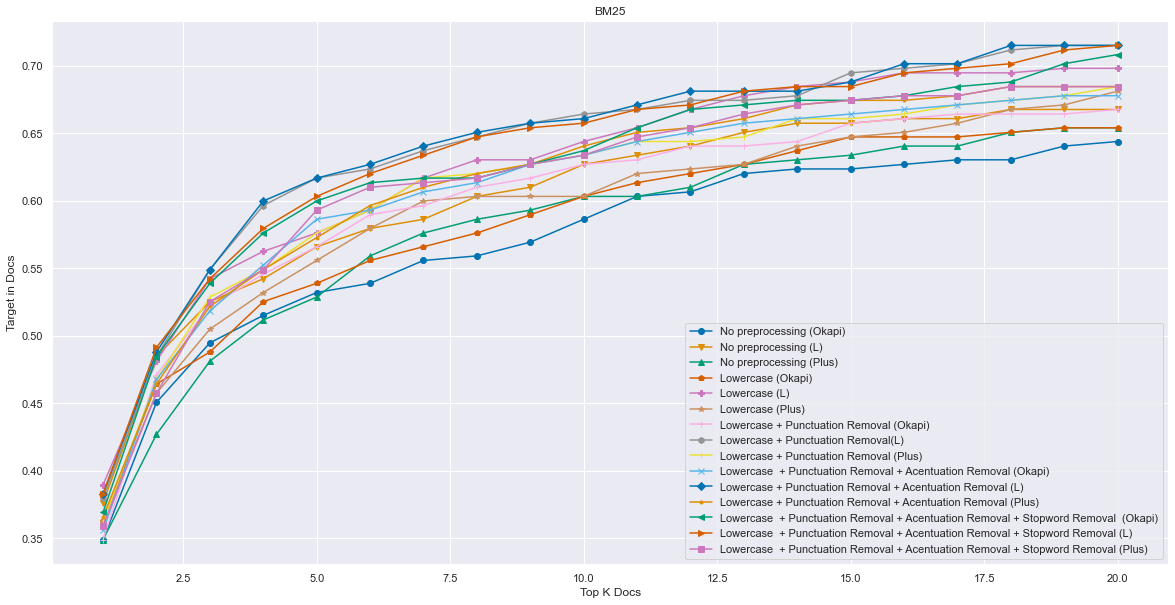

In [76]:
#Grafico com todos os preprocessing
# sns.set(palette='colorblind')
#
# plt.figure(figsize=(20,10))
#
# plt.plot(np.arange(1,21), res_tok,  marker='o', label="No preprocessing (Okapi)")
# plt.plot(np.arange(1,21), res_tokL,  marker='v', label="No preprocessing (L)")
# plt.plot(np.arange(1,21), res_tokP, marker='^', label="No preprocessing (Plus)")
#
#
# plt.plot(np.arange(1,21), res_just_lower, marker='p', label="Lowercase (Okapi)")
# plt.plot(np.arange(1,21), res_just_lowerL, marker='P', label="Lowercase (L)")
# plt.plot(np.arange(1,21), res_just_lowerP, marker='*', label="Lowercase (Plus)")
#
# plt.plot(np.arange(1,21), res_lower_punc, marker='+', label="Lowercase + Punctuation Removal (Okapi)")
# plt.plot(np.arange(1,21), res_lower_puncL, marker='h', label="Lowercase + Punctuation Removal(L)")
# plt.plot(np.arange(1,21), res_lower_puncP, marker='|', label="Lowercase + Punctuation Removal (Plus)")
#
# plt.plot(np.arange(1,21), res_acent, marker='x', label="Lowercase  + Punctuation Removal + Acentuation Removal (Okapi)")
# plt.plot(np.arange(1,21), res_acentL, marker='D', label="Lowercase + Punctuation Removal + Acentuation Removal (L)")
# plt.plot(np.arange(1,21), res_acentP, marker='.', label="Lowercase + Punctuation Removal + Acentuation Removal (Plus)")
#
# plt.plot(np.arange(1,21), res_stopword, marker='<', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal  (Okapi)")
# plt.plot(np.arange(1,21), res_stopwordL, marker='>', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal (L)")
# plt.plot(np.arange(1,21), res_stopwordP, marker='s', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal (Plus)")
# plt.title("BM25")
# plt.legend()
# plt.ylabel("Target in Docs")
# plt.xlabel("Top K Docs")
# plt.show()

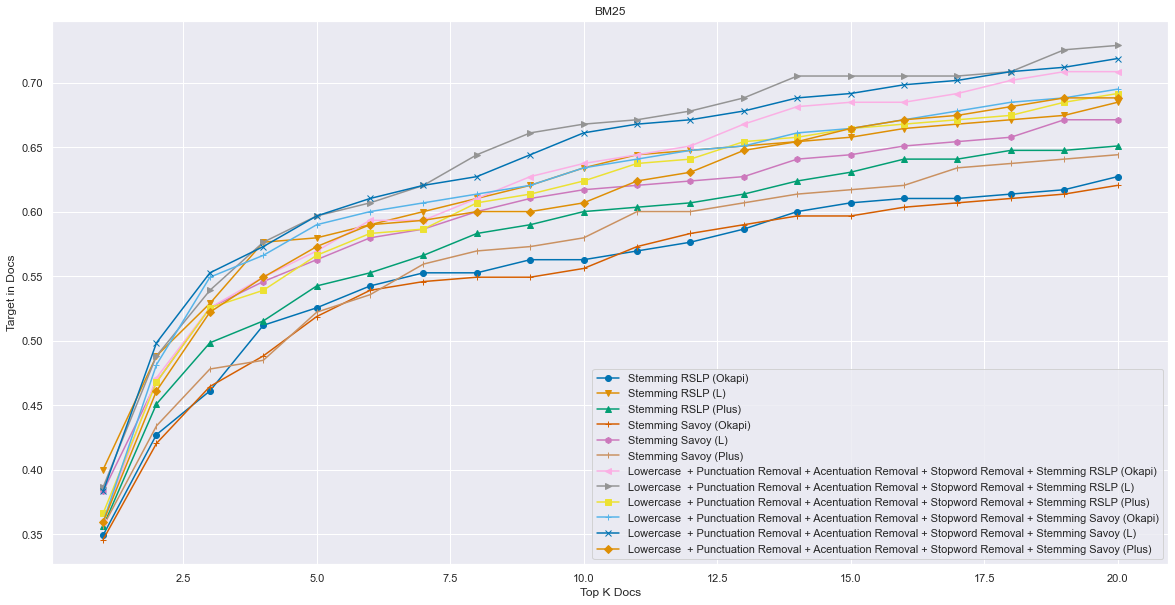

In [86]:
# #Grafico com todos os word n-gram

# sns.set(palette='colorblind')
#
# plt.figure(figsize=(20,10))
#
# plt.plot(np.arange(1,21), res_rslp,  marker='o', label="Stemming RSLP (Okapi)")
# plt.plot(np.arange(1,21), res_rslpL,  marker='v', label="Stemming RSLP (L)")
# plt.plot(np.arange(1,21), res_rslpP, marker='^', label="Stemming RSLP (Plus)")
#
# plt.plot(np.arange(1,21), res_savoy, marker='+', label="Stemming Savoy (Okapi)")
# plt.plot(np.arange(1,21), res_savoyL, marker='h', label="Stemming Savoy (L)")
# plt.plot(np.arange(1,21), res_savoyP, marker='|', label="Stemming Savoy (Plus)")
#
# plt.plot(np.arange(1,21), res_pre_rslp, marker='<', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming RSLP (Okapi)")
# plt.plot(np.arange(1,21), res_pre_rslpL, marker='>', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming RSLP (L)")
# plt.plot(np.arange(1,21), res_pre_rslpP, marker='s', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming RSLP (Plus)")
#
# plt.plot(np.arange(1,21), res_pre_savoy, marker='+', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming Savoy (Okapi)")
# plt.plot(np.arange(1,21), res_pre_savoyL, marker='x', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming Savoy (L)")
# plt.plot(np.arange(1,21), res_pre_savoyP, marker='D', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming Savoy (Plus)")
#
# plt.title("BM25")
# plt.legend()
# plt.ylabel("Target in Docs")
# plt.xlabel("Top K Docs")
# plt.show()

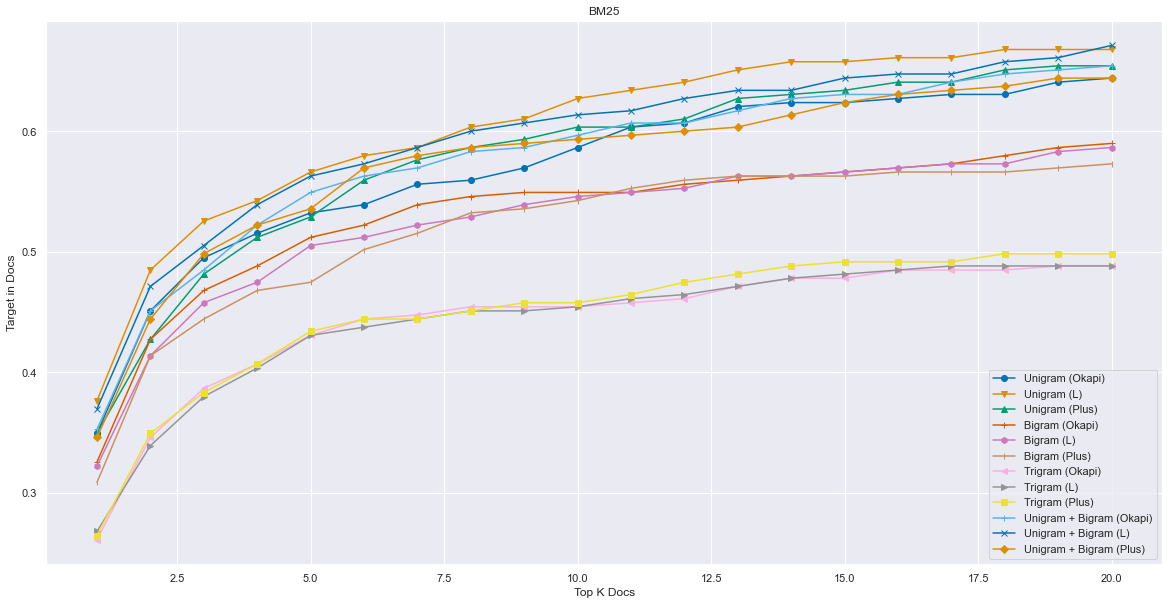

In [30]:
# #Grafico com todos os word n-gram

# sns.set(palette='colorblind')
#
# plt.figure(figsize=(20,10))
#
# plt.plot(np.arange(1,21), res_tok,  marker='o', label="Unigram (Okapi)")
# plt.plot(np.arange(1,21), res_tokL,  marker='v', label="Unigram (L)")
# plt.plot(np.arange(1,21), res_tokP, marker='^', label="Unigram (Plus)")
#
# plt.plot(np.arange(1,21), res_bigram, marker='+', label="Bigram (Okapi)")
# plt.plot(np.arange(1,21), res_bigramL, marker='h', label="Bigram (L)")
# plt.plot(np.arange(1,21), res_bigramP, marker='|', label="Bigram (Plus)")
#
# plt.plot(np.arange(1,21), res_trigram, marker='<', label="Trigram (Okapi)")
# plt.plot(np.arange(1,21), res_trigramL, marker='>', label="Trigram (L)")
# plt.plot(np.arange(1,21), res_trigramP, marker='s', label="Trigram (Plus)")
#
# plt.plot(np.arange(1,21), res_uni_bigram, marker='+', label="Unigram + Bigram (Okapi)")
# plt.plot(np.arange(1,21), res_uni_bigramL, marker='x', label="Unigram + Bigram (L)")
# plt.plot(np.arange(1,21), res_uni_bigramP, marker='D', label="Unigram + Bigram (Plus)")
#
# plt.title("BM25")
# plt.legend()
# plt.ylabel("Target in Docs")
# plt.xlabel("Top K Docs")
# plt.show()

In [ ]:
# #Grafico com todos os word n-gram

# sns.set(palette='colorblind')
#
# plt.figure(figsize=(20,10))
#
# plt.plot(np.arange(1,21), res_stopword,  marker='o', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Unigram (Okapi)")
# plt.plot(np.arange(1,21), res_stopwordL,  marker='v', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Unigram (L)")
# plt.plot(np.arange(1,21), res_stopwordP, marker='^', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Unigram (Plus)")
#
# plt.plot(np.arange(1,21), res_pre_bigram, marker='+', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Bigram (Okapi)")
# plt.plot(np.arange(1,21), res_pre_bigramL, marker='h', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Bigram (L)")
# plt.plot(np.arange(1,21), res_pre_bigramP, marker='|', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Bigram (Plus)")
#
# plt.plot(np.arange(1,21), res_pre_trigram, marker='<', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Trigram (Okapi)")
# plt.plot(np.arange(1,21), res_pre_trigramL, marker='>', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Trigram (L)")
# plt.plot(np.arange(1,21), res_pre_trigramP, marker='s', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Trigram (Plus)")
#
# plt.plot(np.arange(1,21), res_pre_uni_bigram, marker='+', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Unigram + Bigram (Okapi)")
# plt.plot(np.arange(1,21), res_pre_uni_bigramL, marker='x', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Unigram + Bigram (L)")
# plt.plot(np.arange(1,21), res_pre_uni_bigramP, marker='D', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Unigram + Bigram (Plus)")
#
# plt.title("BM25")
# plt.legend()
# plt.ylabel("Target in Docs")
# plt.xlabel("Top K Docs")
# plt.show()

In [50]:
# #Grafico com todos os word n-gram

sns.set(palette='colorblind')

plt.figure(figsize=(20,10))

plt.plot(np.arange(1,21), res_pre_rslp,  marker='o', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming RSLP + Unigram (Okapi)")
plt.plot(np.arange(1,21), res_pre_rslpL,  marker='v', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming RSLP + Unigram (L)")
plt.plot(np.arange(1,21), res_pre_rslpP, marker='^', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming RSLP + Unigram (Plus)")

plt.plot(np.arange(1,21), res_bigram_rslp, marker='+', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming RSLP + Bigram (Okapi)")
plt.plot(np.arange(1,21), res_bigram_rslpL, marker='h', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming RSLP + Bigram (L)")
plt.plot(np.arange(1,21), res_bigram_rslpP, marker='|', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming RSLP + Bigram (Plus)")

plt.plot(np.arange(1,21), res_trigram_rslp, marker='<', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming RSLP + Trigram (Okapi)")
plt.plot(np.arange(1,21), res_trigram_rslpL, marker='>', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming RSLP + Trigram (L)")
plt.plot(np.arange(1,21), res_trigram_rslpP, marker='s', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming RSLP + Trigram (Plus)")

plt.plot(np.arange(1,21), res_uni_bigram_rslp, marker='+', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming RSLP + Unigram + Bigram (Okapi)")
plt.plot(np.arange(1,21), res_uni_bigram_rslpL, marker='x', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming RSLP + Unigram + Bigram (L)")
plt.plot(np.arange(1,21), res_uni_bigram_rslpP, marker='D', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming RSLP + Unigram + Bigram (Plus)")

plt.title("BM25")
plt.legend()
plt.ylabel("Target in Docs")
plt.xlabel("Top K Docs")
plt.show()

AttributeError: module 'matplotlib' has no attribute 'get_data_path'

In [ ]:
# #Grafico com todos os word n-gram

sns.set(palette='colorblind')

plt.figure(figsize=(20,10))

plt.plot(np.arange(1,21), res_pre_savoy,  marker='o', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming Savoy + Unigram (Okapi)")
plt.plot(np.arange(1,21), res_pre_savoyL,  marker='v', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming Savoy + Unigram (L)")
plt.plot(np.arange(1,21), res_pre_savoyP, marker='^', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming Savoy + Unigram (Plus)")

plt.plot(np.arange(1,21), res_bigram_savoy, marker='+', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming Savoy + Bigram (Okapi)")
plt.plot(np.arange(1,21), res_bigram_savoyL, marker='h', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming Savoy + Bigram (L)")
plt.plot(np.arange(1,21), res_bigram_savoyP, marker='|', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming Savoy + Bigram (Plus)")

plt.plot(np.arange(1,21), res_trigram_savoy, marker='<', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming Savoy + Trigram (Okapi)")
plt.plot(np.arange(1,21), res_trigram_savoyL, marker='>', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming Savoy + Trigram (L)")
plt.plot(np.arange(1,21), res_trigram_savoyP, marker='s', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming Savoy + Trigram (Plus)")

plt.plot(np.arange(1,21), res_uni_bigram_savoy, marker='+', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming Savoy + Unigram + Bigram (Okapi)")
plt.plot(np.arange(1,21), res_uni_bigram_savoyL, marker='x', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming Savoy + Unigram + Bigram (L)")
plt.plot(np.arange(1,21), res_uni_bigram_savoyP, marker='D', label="Lowercase  + Punctuation Removal + Acentuation Removal + Stopword Removal + Stemming Savoy + Unigram + Bigram (Plus)")

plt.title("BM25")
plt.legend()
plt.ylabel("Target in Docs")
plt.xlabel("Top K Docs")
plt.show()